# Weekly Multi-regression

## standardize independent & replace time by time2 & log Grade already 

In [162]:
#載入所需函示庫

from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
#pd.options.display.max_rows = 999

### 以週為單位的multi-regression
#### Y是個人小考成績；X是該週前該週進度影片的「觀看總時長」、「暫停次數」、「平均播放速度」

In [163]:
#讀取資料集
df = pd.read_csv('./2019-Spring-Statistics-Project-master/2019-Spring-Statistics-Project-master/data/OR107 grades.csv')

print('Head of dataset:')
display(df.head())

print("Tail of dataset:")
display(df.tail())

Head of dataset:


,student_id,Section,Case Assignment 1 (1579),Case Assignment 2 (1843),Case Assignment 3 (2014),Pre-lecture problems for Lecture 2 (1631),Pre-lecture problems for Lecture 3 (1683),Pre-lecture problems for Lecture 4 (1731),Pre-lecture problems for Lecture 5 (1779),Pre-lecture Problems for Lecture 6 (1811),Pre-lecture Problems for Lecture 7 (1877),Pre-lecture Problems for Lecture 9 (1942),Pre-lecture Problems for Lecture 10 (1990),Pre-lecture Problems for Lecture 11 (2025),Homework 1 (1776),Homework 2 (1928),Homework 3 (2103),Final project proposal (2125),Final project (2126),Final Exam (2231)
0,Points Possible,NaN,100.0,100.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,100.0,100.0,100.0,0.0,0.00,100.0
1,88,107-2 作業研究 Operations Research,72.0,NaN,NaN,NaN,9.0,NaN,8.0,10.0,NaN,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN
2,89,107-2 作業研究 Operations Research,72.0,82.0,84.0,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,NaN,76.0,85.0,69.0,NaN,92.69,41.0
3,90,107-2 作業研究 Operations Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,91,107-2 作業研究 Operations Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tail of dataset:


,student_id,Section,Case Assignment 1 (1579),Case Assignment 2 (1843),Case Assignment 3 (2014),Pre-lecture problems for Lecture 2 (1631),Pre-lecture problems for Lecture 3 (1683),Pre-lecture problems for Lecture 4 (1731),Pre-lecture problems for Lecture 5 (1779),Pre-lecture Problems for Lecture 6 (1811),Pre-lecture Problems for Lecture 7 (1877),Pre-lecture Problems for Lecture 9 (1942),Pre-lecture Problems for Lecture 10 (1990),Pre-lecture Problems for Lecture 11 (2025),Homework 1 (1776),Homework 2 (1928),Homework 3 (2103),Final project proposal (2125),Final project (2126),Final Exam (2231)
79,166,107-2 作業研究 Operations Research,69.0,86.0,100.0,10.0,9.0,8.0,10.0,10.0,NaN,10.0,8.0,8.0,100.0,78.0,93.0,NaN,94.76,70.0
80,167,107-2 作業研究 Operations Research,87.0,NaN,NaN,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,168,107-2 作業研究 Operations Research,72.0,90.0,97.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,9.0,98.0,95.0,89.0,NaN,94.61,75.0
82,169,107-2 作業研究 Operations Research,117.0,95.0,100.0,10.0,8.0,10.0,10.0,10.0,8.0,8.0,9.0,10.0,98.0,96.0,85.0,NaN,98.50,82.0
83,170,107-2 作業研究 Operations Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
df.columns

Index(['student_id', 'Section', 'Case Assignment 1 (1579)',
       'Case Assignment 2 (1843)', 'Case Assignment 3 (2014)',
       'Pre-lecture problems for Lecture 2 (1631)',
       'Pre-lecture problems for Lecture 3 (1683)',
       'Pre-lecture problems for Lecture 4 (1731)',
       'Pre-lecture problems for Lecture 5 (1779)',
       'Pre-lecture Problems for Lecture 6 (1811)',
       'Pre-lecture Problems for Lecture 7 (1877)',
       'Pre-lecture Problems for Lecture 9 (1942)',
       'Pre-lecture Problems for Lecture 10 (1990)',
       'Pre-lecture Problems for Lecture 11 (2025)', 'Homework 1 (1776)',
       'Homework 2 (1928)', 'Homework 3 (2103)',
       'Final project proposal (2125)', 'Final project (2126)',
       'Final Exam (2231)'],
      dtype='object')

In [165]:
df_grade = df.loc[:,['student_id',
          'Pre-lecture problems for Lecture 2 (1631)',
   'Pre-lecture problems for Lecture 3 (1683)',
       'Pre-lecture problems for Lecture 4 (1731)',
       'Pre-lecture problems for Lecture 5 (1779)',
       'Pre-lecture Problems for Lecture 6 (1811)',
       'Pre-lecture Problems for Lecture 7 (1877)',
       'Pre-lecture Problems for Lecture 9 (1942)',
       'Pre-lecture Problems for Lecture 10 (1990)',
          'Pre-lecture Problems for Lecture 11 (2025)']]

print('Head of dataset:')
display(df_grade.head())

print("Tail of dataset:")
display(df_grade.tail())

Head of dataset:


,student_id,Pre-lecture problems for Lecture 2 (1631),Pre-lecture problems for Lecture 3 (1683),Pre-lecture problems for Lecture 4 (1731),Pre-lecture problems for Lecture 5 (1779),Pre-lecture Problems for Lecture 6 (1811),Pre-lecture Problems for Lecture 7 (1877),Pre-lecture Problems for Lecture 9 (1942),Pre-lecture Problems for Lecture 10 (1990),Pre-lecture Problems for Lecture 11 (2025)
0,Points Possible,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1,88,NaN,9.0,NaN,8.0,10.0,NaN,NaN,NaN,NaN
2,89,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,NaN
3,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tail of dataset:


,student_id,Pre-lecture problems for Lecture 2 (1631),Pre-lecture problems for Lecture 3 (1683),Pre-lecture problems for Lecture 4 (1731),Pre-lecture problems for Lecture 5 (1779),Pre-lecture Problems for Lecture 6 (1811),Pre-lecture Problems for Lecture 7 (1877),Pre-lecture Problems for Lecture 9 (1942),Pre-lecture Problems for Lecture 10 (1990),Pre-lecture Problems for Lecture 11 (2025)
79,166,10.0,9.0,8.0,10.0,10.0,NaN,10.0,8.0,8.0
80,167,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,168,9.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,9.0
82,169,10.0,8.0,10.0,10.0,10.0,8.0,8.0,9.0,10.0
83,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
df_grade = df_grade.iloc[1:]
df_grade.set_index('student_id', inplace=True)
print('Head of dataset:')
display(df_grade.head())

Head of dataset:


,Pre-lecture problems for Lecture 2 (1631),Pre-lecture problems for Lecture 3 (1683),Pre-lecture problems for Lecture 4 (1731),Pre-lecture problems for Lecture 5 (1779),Pre-lecture Problems for Lecture 6 (1811),Pre-lecture Problems for Lecture 7 (1877),Pre-lecture Problems for Lecture 9 (1942),Pre-lecture Problems for Lecture 10 (1990),Pre-lecture Problems for Lecture 11 (2025)
student_id,,,,,,,,,
88,NaN,9.0,NaN,8.0,10.0,NaN,NaN,NaN,NaN
89,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
df_grade.columns = ['Lecture 2','Lecture 3','Lecture 4','Lecture 5','Lecture 6','Lecture 7','Lecture 9','Lecture 10','Lecture 11',]
df_grade.head()

,Lecture 2,Lecture 3,Lecture 4,Lecture 5,Lecture 6,Lecture 7,Lecture 9,Lecture 10,Lecture 11
student_id,,,,,,,,,
88,NaN,9.0,NaN,8.0,10.0,NaN,NaN,NaN,NaN
89,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
df_grade = df_grade.fillna(0)
df_grade.head()

,Lecture 2,Lecture 3,Lecture 4,Lecture 5,Lecture 6,Lecture 7,Lecture 9,Lecture 10,Lecture 11
student_id,,,,,,,,,
88,0.0,9.0,0.0,8.0,10.0,0.0,0.0,0.0,0.0
89,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
df_grade.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8]
df_grade.head()

,0,1,2,3,4,5,6,7,8
student_id,,,,,,,,,
88,0.0,9.0,0.0,8.0,10.0,0.0,0.0,0.0,0.0
89,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 上面是「個人小考成績」

In [170]:
#讀取資料集
df_time = pd.read_excel('./OR107time.xlsx')

print('Head of dataset:')
display(df_time.head())

print("Tail of dataset:")
display(df_time.tail())

Head of dataset:


,0,1,2,3,4,5,6,7,8,9,Total
0,88,1993,3111,2048,0,0,4579,0,0,0,11731
1,89,4775,3686,3155,3871,0,0,2087,717,1198,19489
2,90,0,0,0,0,0,0,0,0,0,0
3,91,0,0,0,0,0,0,0,0,0,0
4,92,0,0,0,0,0,0,0,0,0,0


Tail of dataset:


,0,1,2,3,4,5,6,7,8,9,Total
82,170,0,0,0,0,0,0,0,0,0,0
83,171,0,0,0,0,0,0,0,0,0,0
84,172,0,0,0,0,0,0,0,0,0,0
85,173,0,0,0,0,0,0,0,0,0,0
86,174,0,0,0,0,0,0,0,0,0,0


In [171]:
df_time.set_index(df_time[0], inplace=True)

print('Head of dataset:')
display(df_time.head())

Head of dataset:


,0,1,2,3,4,5,6,7,8,9,Total
0,,,,,,,,,,,
88,88,1993,3111,2048,0,0,4579,0,0,0,11731
89,89,4775,3686,3155,3871,0,0,2087,717,1198,19489
90,90,0,0,0,0,0,0,0,0,0,0
91,91,0,0,0,0,0,0,0,0,0,0
92,92,0,0,0,0,0,0,0,0,0,0


In [172]:
df_time = df_time.drop(columns = 0)
df_time.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 'Total']
df_time.head()

,0,1,2,3,4,5,6,7,8,Total
0,,,,,,,,,,
88,1993,3111,2048,0,0,4579,0,0,0,11731
89,4775,3686,3155,3871,0,0,2087,717,1198,19489
90,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0


#### 上面是「觀看總時長」

In [173]:
#讀取資料集
df_pause = pd.read_excel('./OR 107pause.xlsx')

print('Head of dataset:')
display(df_pause.head())

print("Tail of dataset:")
display(df_pause.tail())

Head of dataset:


,0,1,2,3,4,5,6,7,8,9,Total
0,88,17,11,11,0,0,19,0,0,0,58
1,89,34,19,21,20,0,0,7,2,4,107
2,90,0,0,0,0,0,0,0,0,0,0
3,91,0,0,0,0,0,0,0,0,0,0
4,92,0,0,0,0,0,0,0,0,0,0


Tail of dataset:


,0,1,2,3,4,5,6,7,8,9,Total
82,170,0,0,0,0,0,0,0,0,0,0
83,171,0,0,0,0,0,0,0,0,0,0
84,172,0,0,0,0,0,0,0,0,0,0
85,173,0,0,0,0,0,0,0,0,0,0
86,174,0,0,0,0,0,0,0,0,0,0


In [174]:
df_pause.set_index(0, inplace=True)

print('Head of dataset:')
display(df_pause.head())

Head of dataset:


,1,2,3,4,5,6,7,8,9,Total
0,,,,,,,,,,
88,17,11,11,0,0,19,0,0,0,58
89,34,19,21,20,0,0,7,2,4,107
90,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0


In [175]:
df_pause.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 'Total']
df_pause.head()

,0,1,2,3,4,5,6,7,8,Total
0,,,,,,,,,,
88,17,11,11,0,0,19,0,0,0,58
89,34,19,21,20,0,0,7,2,4,107
90,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0


#### 上面是「暫停次數」

In [176]:
#讀取資料集
df_rate = pd.read_excel('./OR107average_playback_rate.xlsx')

print('Head of dataset:')
display(df_rate.head())

print("Tail of dataset:")
display(df_rate.tail())

Head of dataset:


,0,1,2,3,4,5,6,7,8,9
0,88,1.030105,1.293796,1.554199,0.000000,0.0,0.94038,0.000000,0.000000,0.000000
1,89,1.214450,1.275638,1.451664,1.331439,0.0,0.00000,1.472448,1.447699,1.321369
2,90,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
3,91,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
4,92,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000


Tail of dataset:


,0,1,2,3,4,5,6,7,8,9
82,170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
df_rate.set_index(0, inplace=True)

print('Head of dataset:')
display(df_rate.head())

Head of dataset:


,1,2,3,4,5,6,7,8,9
0,,,,,,,,,
88,1.030105,1.293796,1.554199,0.000000,0.0,0.94038,0.000000,0.000000,0.000000
89,1.214450,1.275638,1.451664,1.331439,0.0,0.00000,1.472448,1.447699,1.321369
90,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
91,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
92,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000


In [178]:
df_rate.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8]
df_rate.head()

,0,1,2,3,4,5,6,7,8
0,,,,,,,,,
88,1.030105,1.293796,1.554199,0.000000,0.0,0.94038,0.000000,0.000000,0.000000
89,1.214450,1.275638,1.451664,1.331439,0.0,0.00000,1.472448,1.447699,1.321369
90,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
91,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
92,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000


#### 上面是「平均播放速度」

## week資料

## standardize independent & replace time by time2 & log Grade already 

In [179]:
def scatter(week):
    y = week['Grade_log'].values
    xnames = ['time_sd2',"pause_sd",'rate_sd']
    print("Sctter Plot:")
    for aname in xnames:
        x = week[aname].values

        _ = plt.plot(x, y, 'o', color = 'b')
        plt.xlabel(aname)
        plt.ylabel('Grade_log')
        plt.show()

In [180]:
def cor(week):
    print("Correlation coefficients:")
    corr1 = week.corr()
    _ = sns.heatmap(corr1, annot=True)

In [181]:
def residual(week_result1):
    print("\n Residual Analysis:")
    for i in range(2):
        if(i == 0):
            hist = plt.hist(week_result1.resid_pearson, bins = 'auto')
        else:
            fig = sm.qqplot(week_result1.resid_pearson, stats.norm, fit=True, line='45')

In [208]:
def outlier(week_result1):
    st, data, ss2 = sso.summary_table(week_result1, alpha=0.05)
    print("Columns in data are: %s" % ss2)

    #Predicted value
    x = data[:, 2]
    #Studentized Residual
    y = data[:, 10]

    plt.plot(x, y, 'o', color = 'gray')
    plt.axhline(y=2, color = 'red', lw = 0.8)
    plt.axhline(y=-2, color = 'red', lw = 0.8)
    plt.show()
    return y

In [209]:
def cooks(week_result1):
    st, data, ss2 = sso.summary_table(week_result1, alpha=0.05)
 #   print("Columns in data are: %s" % ss2)
    x = data[:, 2]
    cook_dist = data[:, 11]
    plt.plot(x, cook_dist, 'o', color = 'gray')
    plt.title("Cook's Distance")
    plt.show()
    return cook_dist

In [193]:
def show(index):  
    Grade = df_grade.iloc[:,index].values
    size = Grade.shape[0]
    time = df_time.iloc[:size,index]
    pause = df_pause.iloc[:size,index]
    rate = df_rate.iloc[:size,index]
    #df_grade
    week = pd.concat([time,pause,rate],axis=1)
    
    week['Grade']=Grade
    week['Grade'] = np.log(week['Grade']+1)
    week.columns = ['time','pause','rate','Grade']
    
    m = week['time'].mean()
    std = week['time'].std()
    week['time'] = (week['time'] - m) / std
    week['time'] = week['time']* week['time']

    m = week['pause'].mean()
    std = week['pause'].std()
    week['pause'] = (week['pause'] - m) / std

    m = week['rate'].mean()
    std = week['rate'].std()
    week['rate'] = (week['rate'] - m) / std
    
    week.columns = ['time_sd2','pause_sd','rate_sd','Grade_log']
    week.head()
    
    #summary statistic
    display(week.describe())
    #plot
    scatter(week)
    
    return week
 

In [185]:
def result(week):
    week = week.dropna()
    week_result1 = smf.ols('Grade_log ~ time_sd2 + pause_sd + rate_sd', data=week).fit()
    # Inspect the results
    print("Model Result:")
    print(week_result1.summary())
    return week_result1

## Week0

,time_sd2,pause_sd,rate_sd,Grade_log
count,83.000000,8.300000e+01,8.300000e+01,83.000000
mean,0.987952,-1.070094e-17,-2.086684e-16,1.491469
std,1.750421,1.000000e+00,1.000000e+00,1.116897
min,0.000991,-7.208116e-01,-1.260309e+00,0.000000
25%,0.337504,-7.208116e-01,-1.260309e+00,0.000000
50%,0.924582,-2.439096e-01,4.814102e-01,2.302585
75%,0.924582,1.972249e-01,7.149787e-01,2.397895
max,15.980795,4.572801e+00,1.601657e+00,2.397895


Sctter Plot:


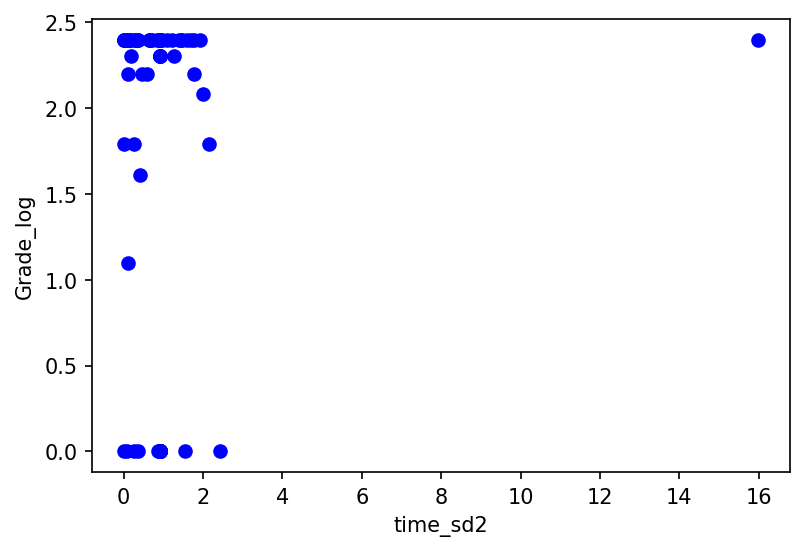

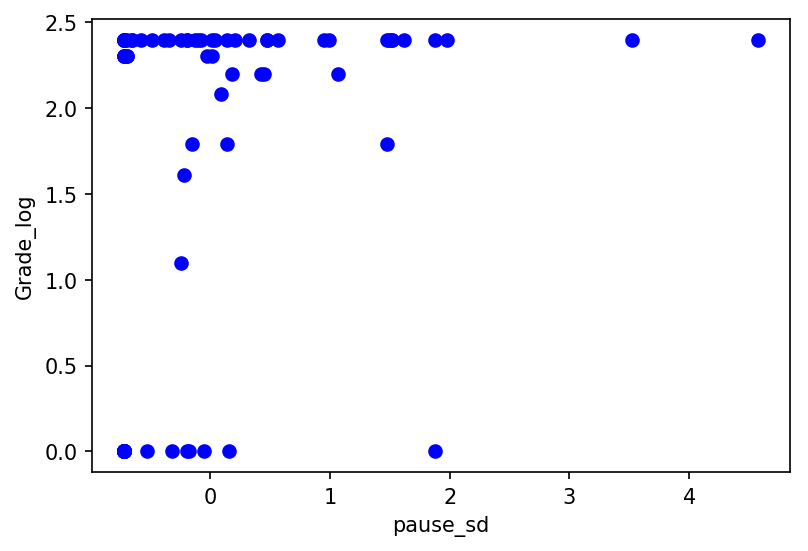

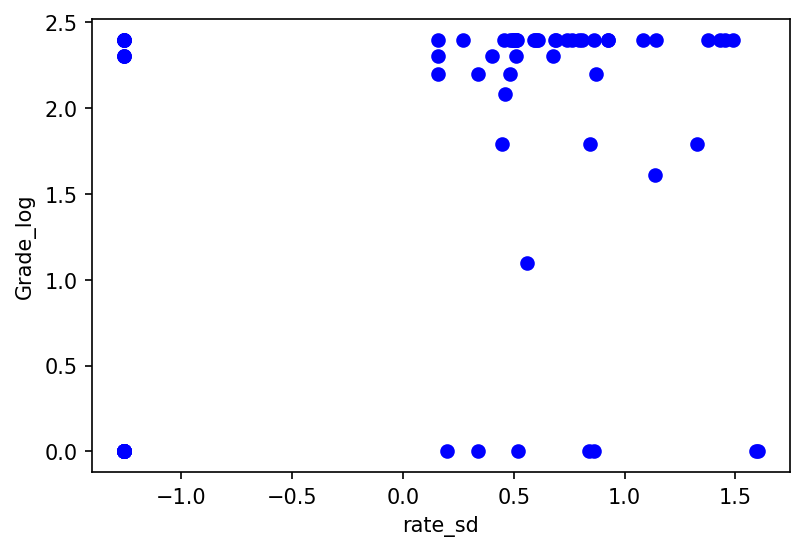

In [241]:
week = show(0)

Correlation coefficients:


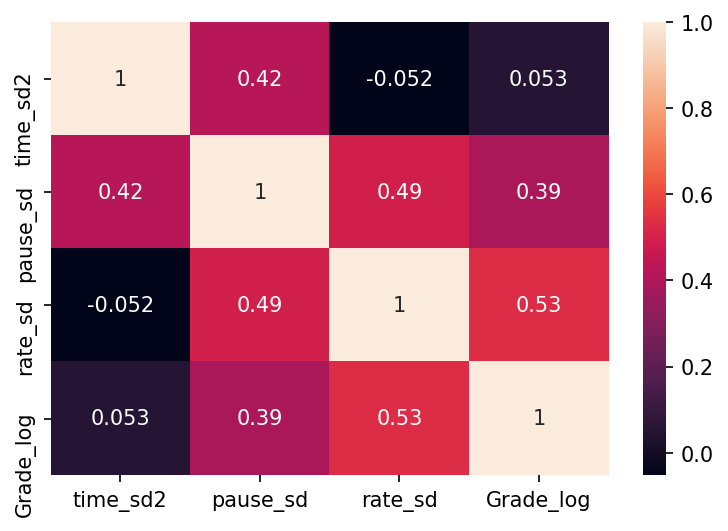

In [242]:
cor(week)

In [243]:
re = result(week)

Model Result:
                            OLS Regression Results                            
Dep. Variable:              Grade_log   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     11.50
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           2.47e-06
Time:                        17:43:55   Log-Likelihood:                -111.41
No. Observations:                  83   AIC:                             230.8
Df Residuals:                      79   BIC:                             240.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4870      0.125     1


 Residual Analysis:


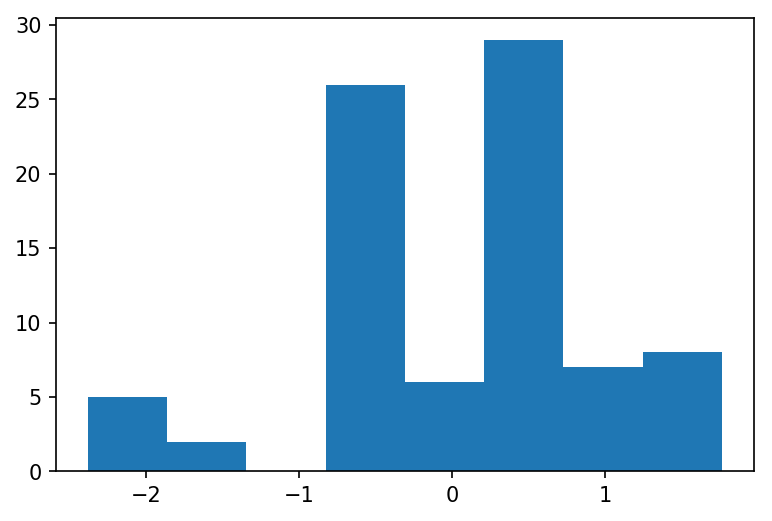

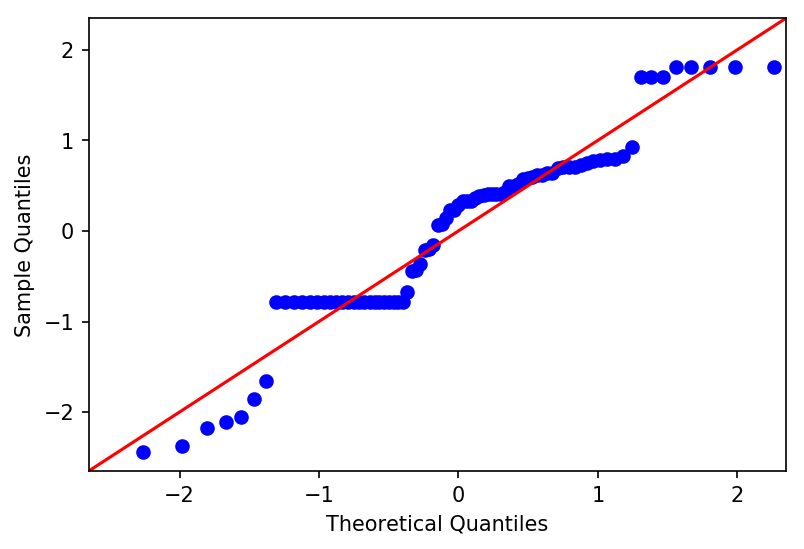

In [244]:
residual(re)

In [245]:
stat, p = stats.shapiro(re.resid_pearson)
print('Shapiro Statistics = %.3f, p = %.3f' % (stat, p))

Shapiro Statistics = 0.937, p = 0.001


Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


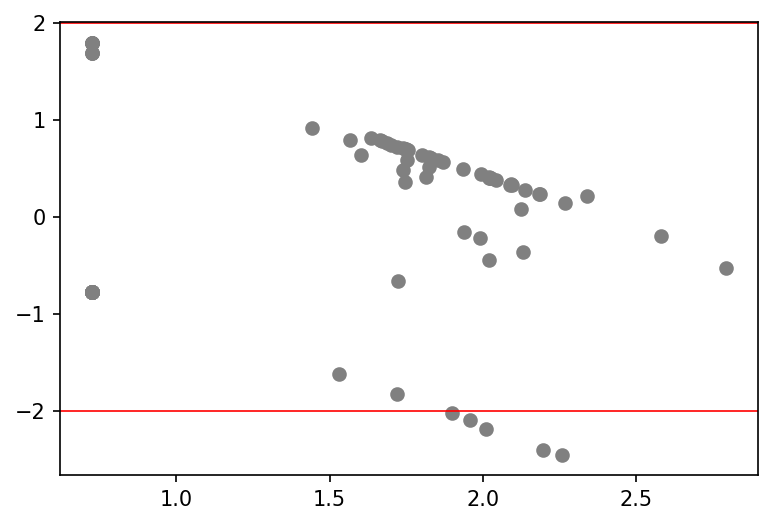

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,


,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,
100,0.257363,-0.196219,1.601657,0.0
102,0.095175,-0.053149,0.838700,0.0
121,2.438660,1.878305,0.336686,0.0
136,1.554317,0.161457,0.862944,0.0
142,0.359781,-0.530051,1.594289,0.0


In [246]:
y = outlier(re)
display(week[y >= 2])
display(week[y <= -2])

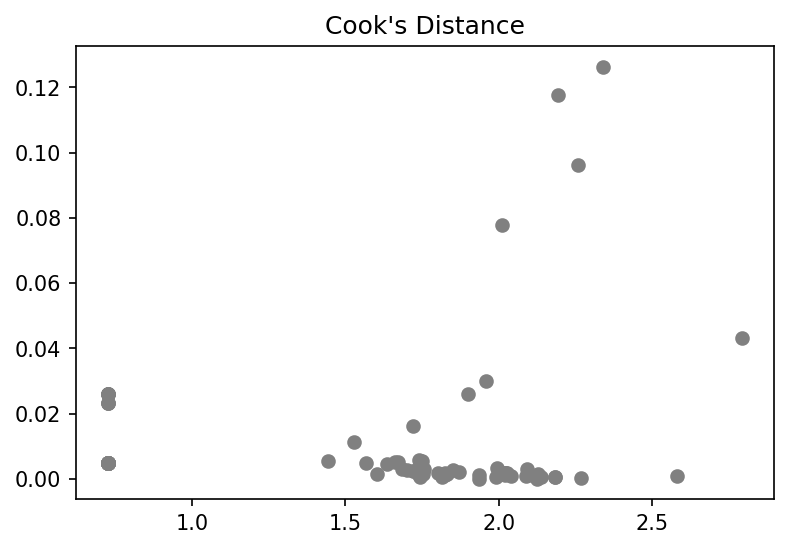

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,


In [247]:
cook = cooks(re)
display(week[cook>=1])

### Week1

,time_sd2,pause_sd,rate_sd,Grade_log
count,83.000000,8.300000e+01,8.300000e+01,83.000000
mean,0.987952,8.426994e-17,3.156779e-16,1.558575
std,1.087838,1.000000e+00,1.000000e+00,1.094843
min,0.026248,-5.639015e-01,-1.345643e+00,0.000000
25%,0.431415,-5.639015e-01,-1.345643e+00,0.000000
50%,1.002996,-3.303126e-01,4.065481e-01,2.302585
75%,1.002996,6.924716e-02,7.769357e-01,2.397895
max,8.562935,5.644643e+00,1.503336e+00,2.397895


Sctter Plot:


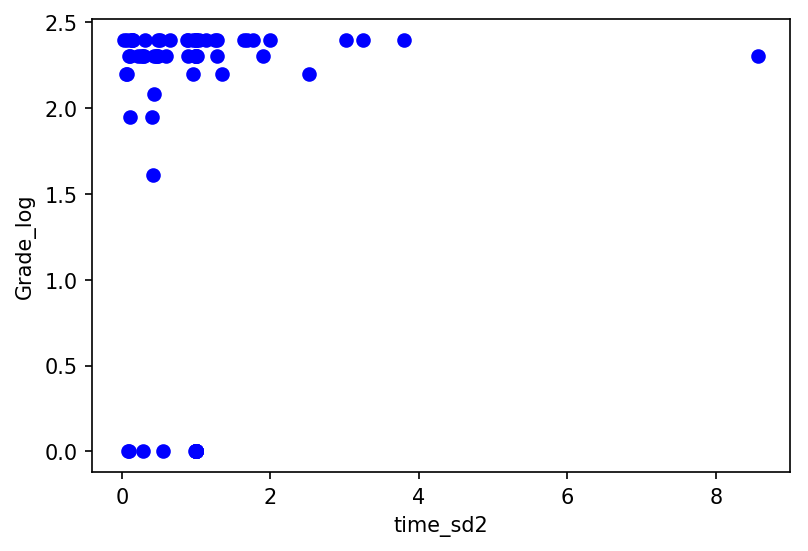

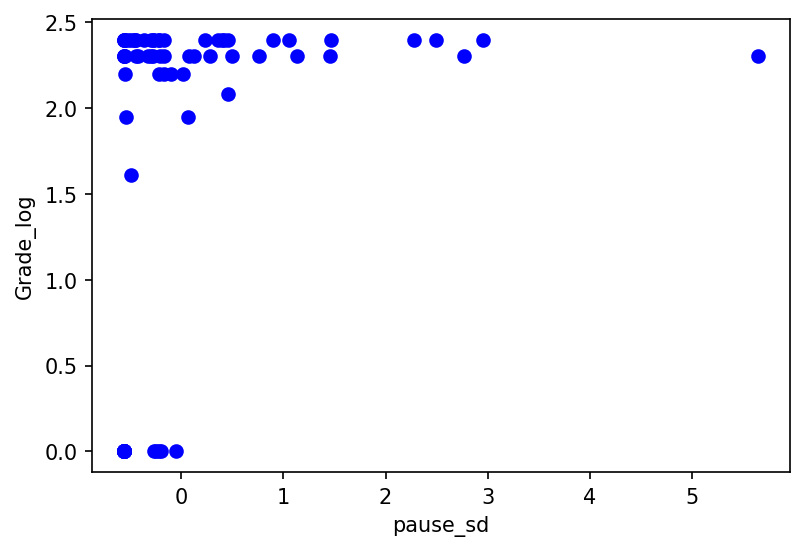

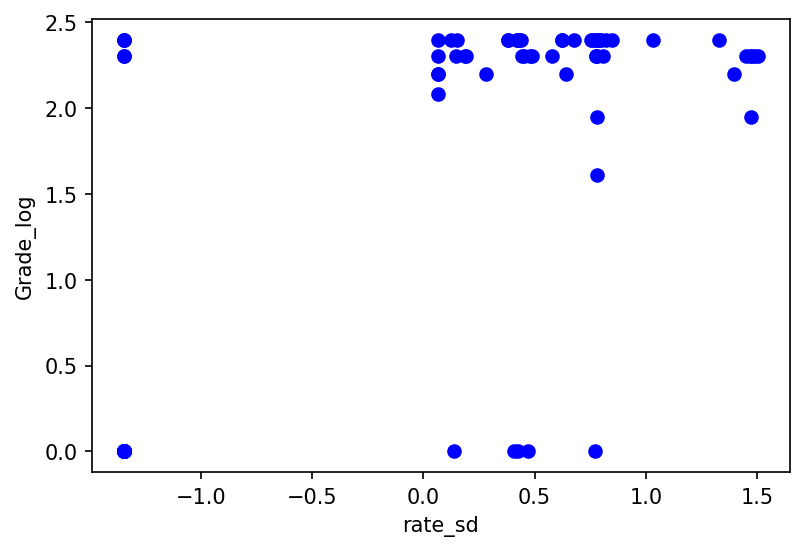

In [248]:
week = show(1)

Correlation coefficients:


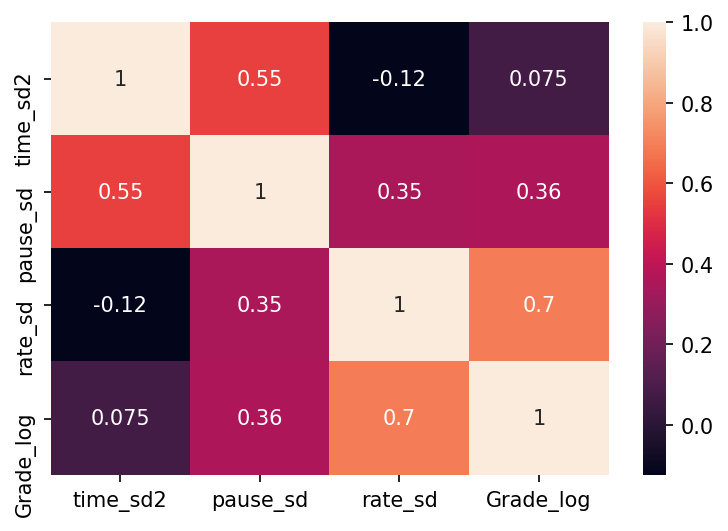

In [249]:
cor(week)

In [250]:
re = result(week)

Model Result:
                            OLS Regression Results                            
Dep. Variable:              Grade_log   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     27.60
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           2.61e-12
Time:                        17:44:05   Log-Likelihood:                -95.040
No. Observations:                  83   AIC:                             198.1
Df Residuals:                      79   BIC:                             207.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4106      0.133     1


 Residual Analysis:


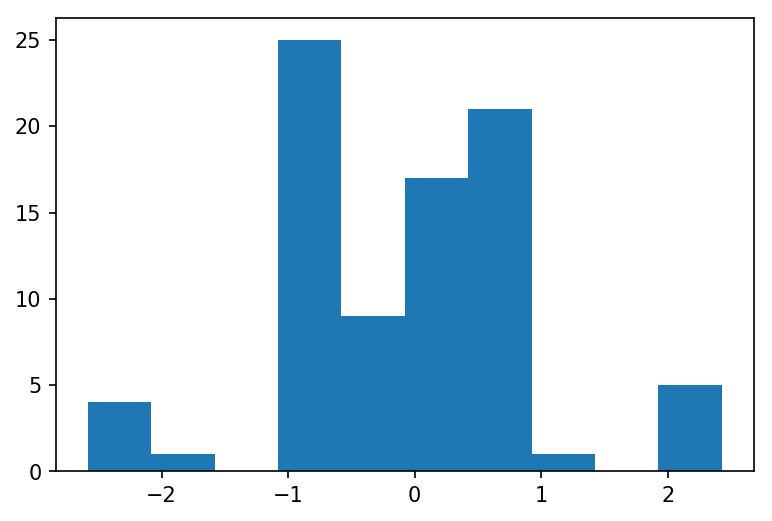

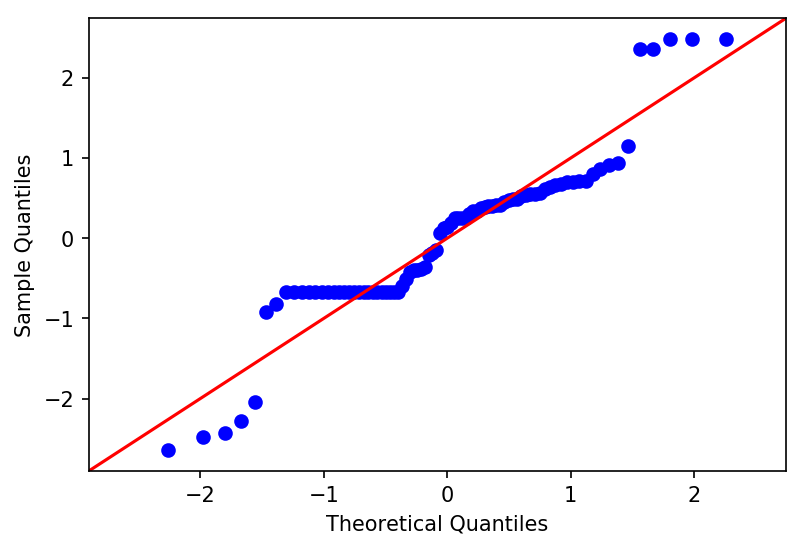

In [251]:
residual(re)

In [252]:
stat, p = stats.shapiro(re.resid_pearson)
print('Shapiro Statistics = %.3f, p = %.3f' % (stat, p))

Shapiro Statistics = 0.912, p = 0.000


Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


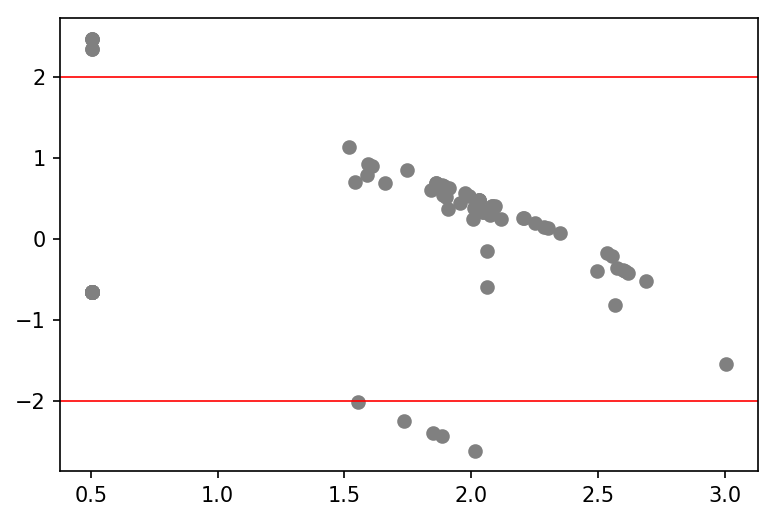

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,
97,1.002996,-0.563901,-1.345643,2.397895
98,1.002996,-0.563901,-1.345643,2.397895
146,1.002996,-0.563901,-1.345643,2.302585
161,1.002996,-0.563901,-1.345643,2.302585
163,1.002996,-0.563901,-1.345643,2.397895


,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,
110,0.098087,-0.195077,0.406548,0.0
121,0.284478,-0.244254,0.140094,0.0
123,0.554017,-0.268842,0.470266,0.0
126,0.982463,-0.047547,0.426863,0.0
136,0.087798,-0.219665,0.771566,0.0


In [253]:
y = outlier(re)
display(week[y >= 2])
display(week[y <= -2])

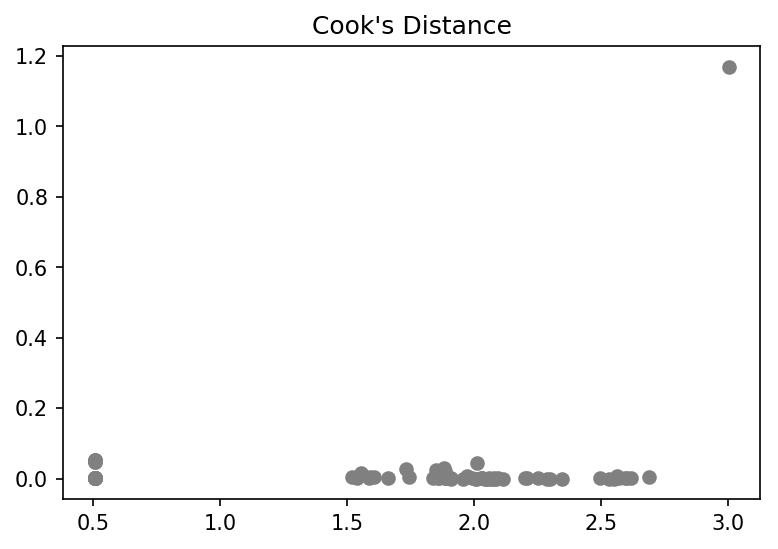

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,
120,8.562935,5.644643,0.187937,2.302585


In [254]:
cook = cooks(re)
display(week[cook>=1])

### Week2

,time_sd2,pause_sd,rate_sd,Grade_log
count,83.000000,8.300000e+01,8.300000e+01,83.000000
mean,0.987952,-2.140189e-17,-1.471380e-17,1.324789
std,0.895420,1.000000e+00,1.000000e+00,1.092140
min,0.031813,-5.614710e-01,-9.924067e-01,0.000000
25%,0.687981,-5.614710e-01,-9.924067e-01,0.000000
50%,0.691247,-5.333636e-01,2.960098e-01,2.079442
75%,0.932709,2.255366e-01,9.320198e-01,2.302585
max,4.703545,4.413541e+00,1.587201e+00,2.397895


Sctter Plot:


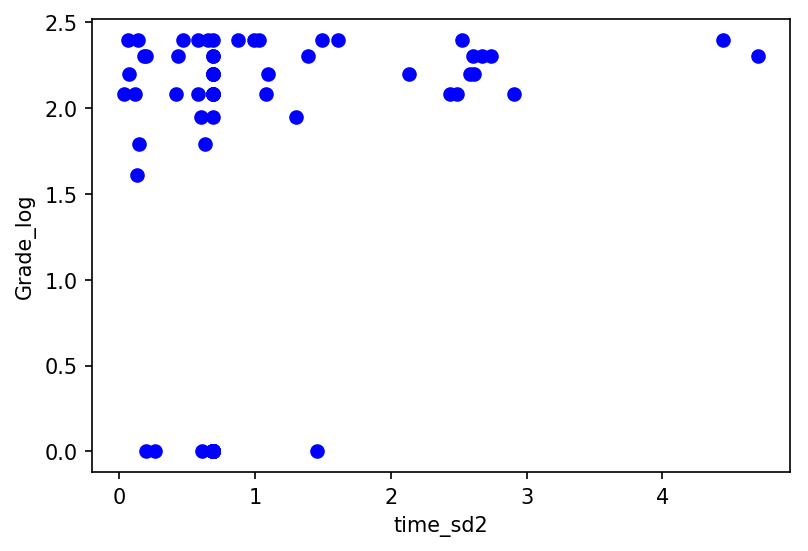

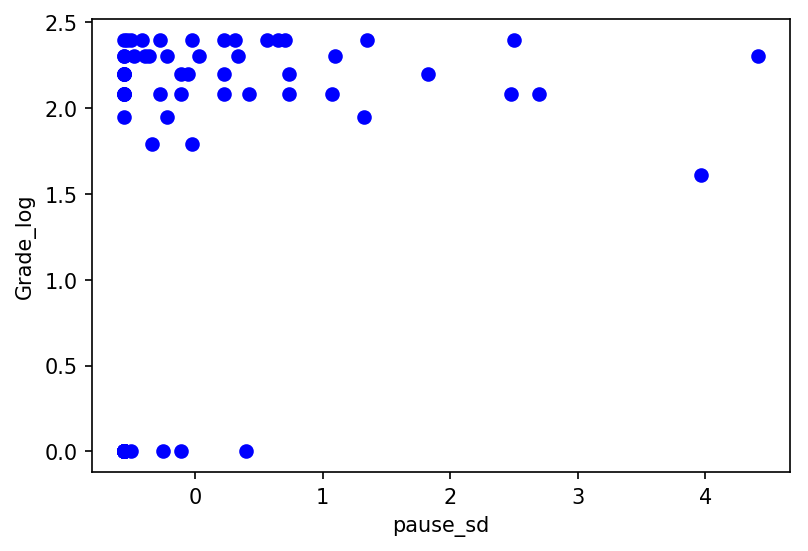

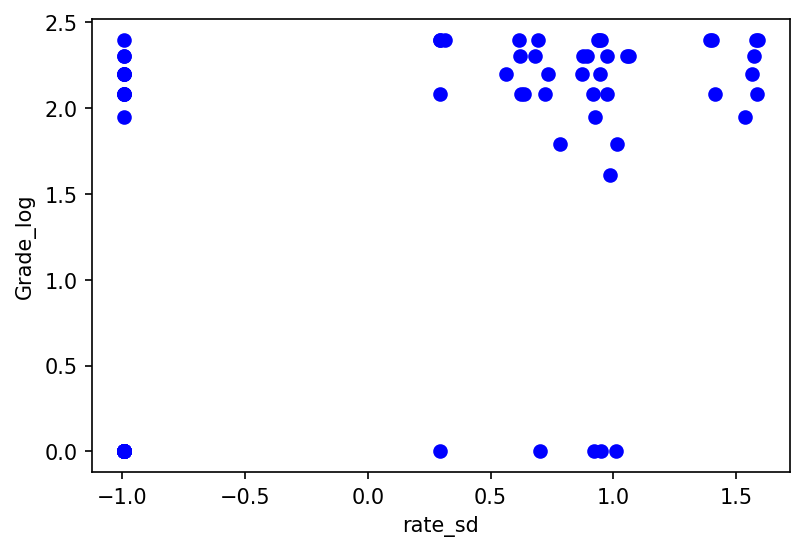

In [255]:
week = show(2)

Correlation coefficients:


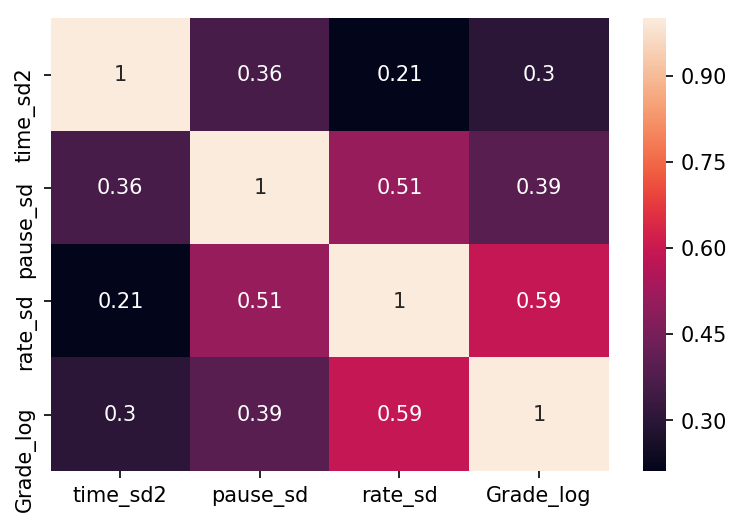

In [256]:
cor(week)

In [257]:
re = result(week)

Model Result:
                            OLS Regression Results                            
Dep. Variable:              Grade_log   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     16.62
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           1.83e-08
Time:                        17:44:50   Log-Likelihood:                -104.28
No. Observations:                  83   AIC:                             216.6
Df Residuals:                      79   BIC:                             226.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1216      0.149      


 Residual Analysis:


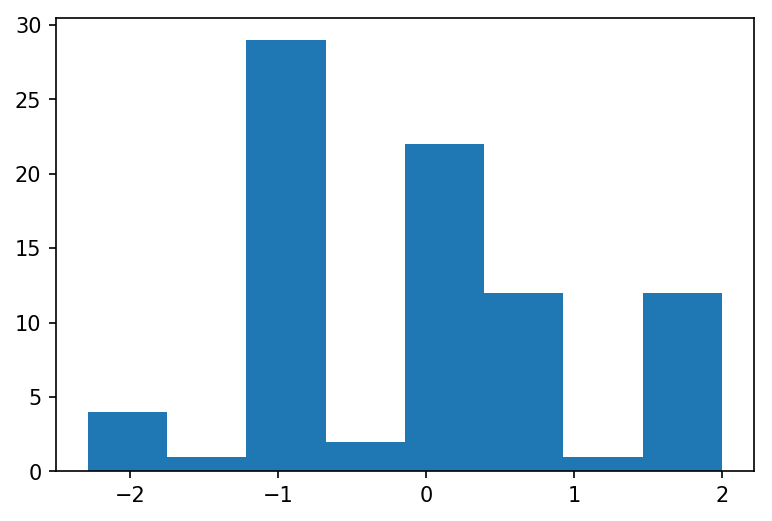

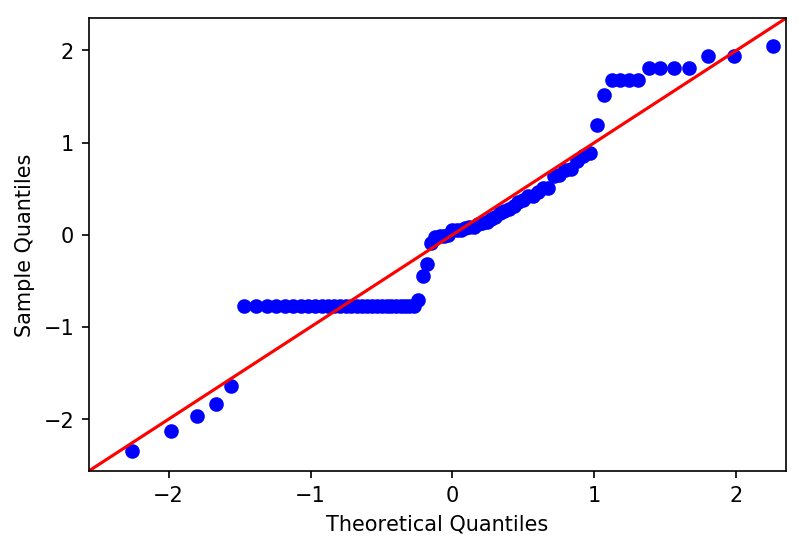

In [258]:
residual(re)

In [259]:
stat, p = stats.shapiro(re.resid_pearson)
print('Shapiro Statistics = %.3f, p = %.3f' % (stat, p))

Shapiro Statistics = 0.930, p = 0.000


Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


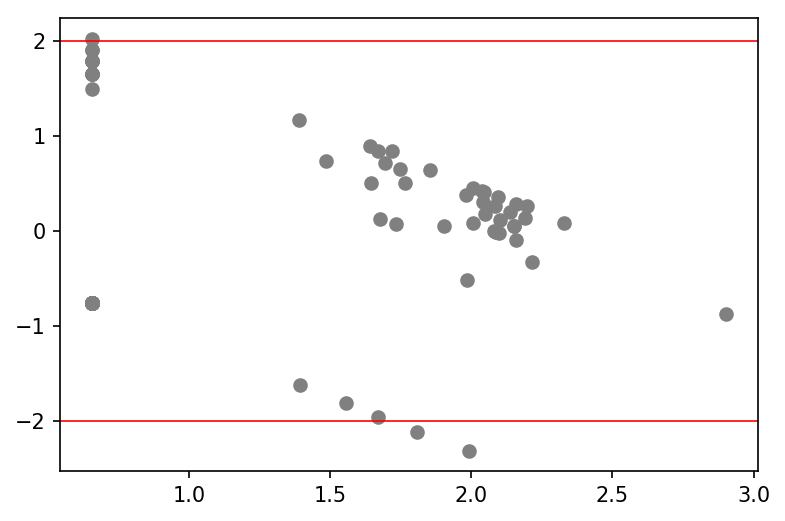

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,
117,0.691247,-0.561471,-0.992407,2.397895


,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,
88,0.611063,-0.252289,1.010049,0.0
102,1.456943,0.394181,0.947188,0.0


In [260]:
y = outlier(re)
display(week[y >= 2])
display(week[y <= -2])

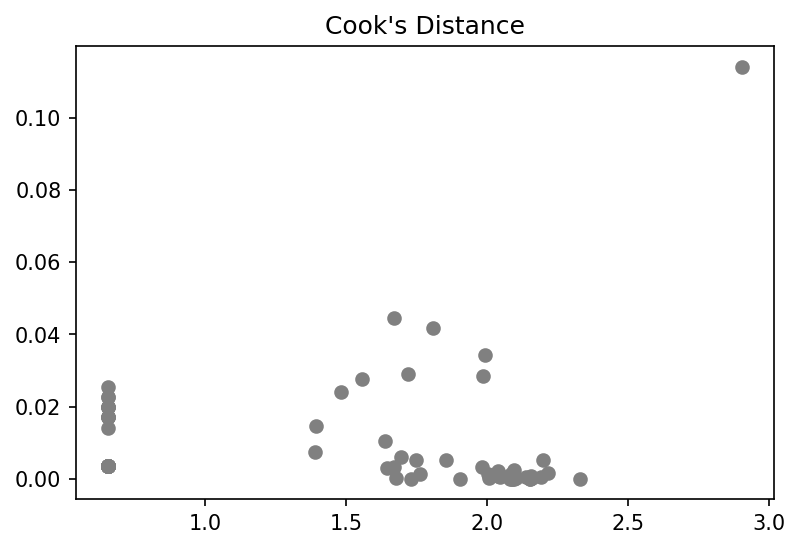

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,


In [261]:
cook = cooks(re)
display(week[cook>=1])

### Week3

,time_sd2,pause_sd,rate_sd,Grade_log
count,83.000000,8.300000e+01,8.300000e+01,83.000000
mean,0.987952,1.471380e-17,-2.541474e-16,1.384822
std,0.819599,1.000000e+00,1.000000e+00,1.154493
min,0.007339,-4.794304e-01,-9.261745e-01,0.000000
25%,0.717933,-4.794304e-01,-9.261745e-01,0.000000
50%,0.717933,-4.794304e-01,-9.261745e-01,2.302585
75%,1.071351,7.212527e-02,1.023290e+00,2.397895
max,4.930023,5.816376e+00,1.689864e+00,2.397895


Sctter Plot:


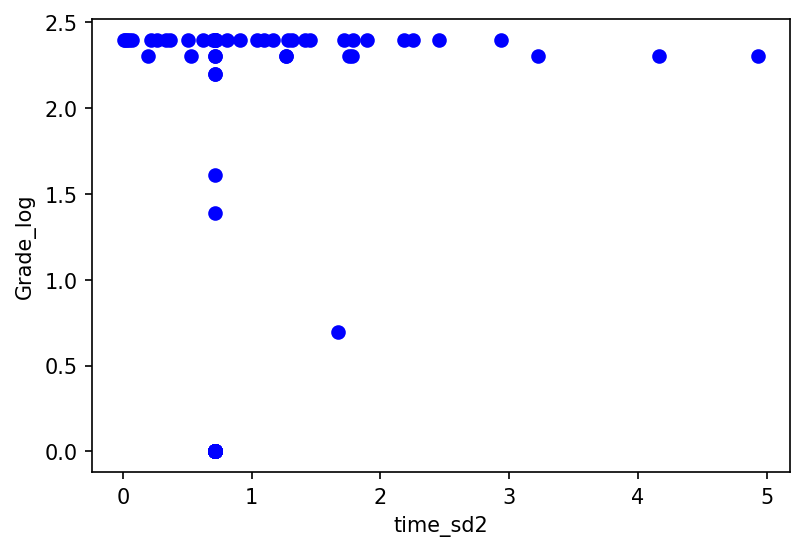

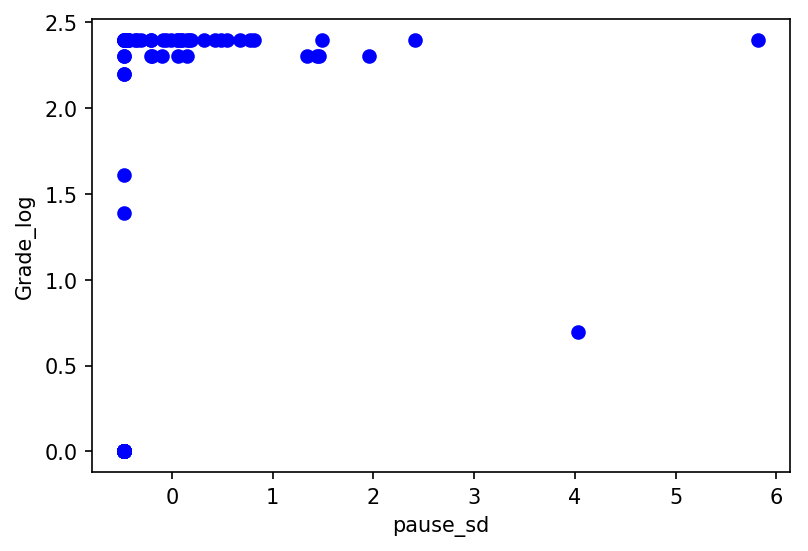

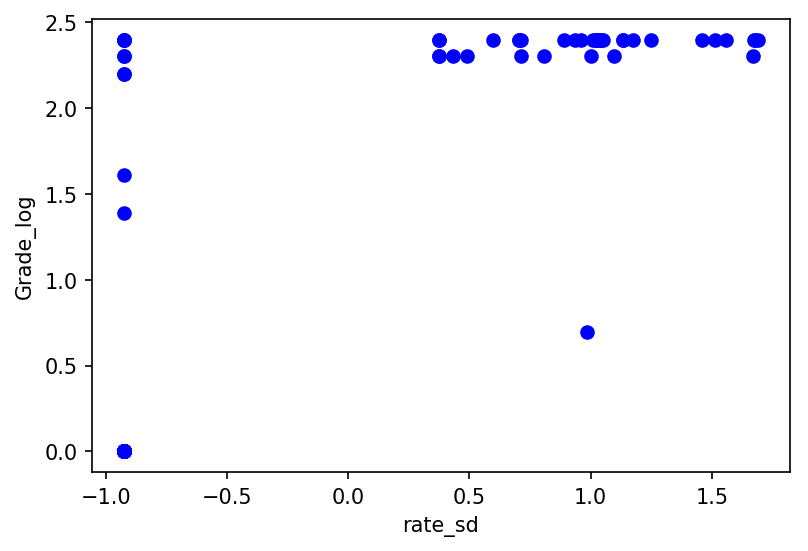

In [262]:
week = show(3)

Correlation coefficients:


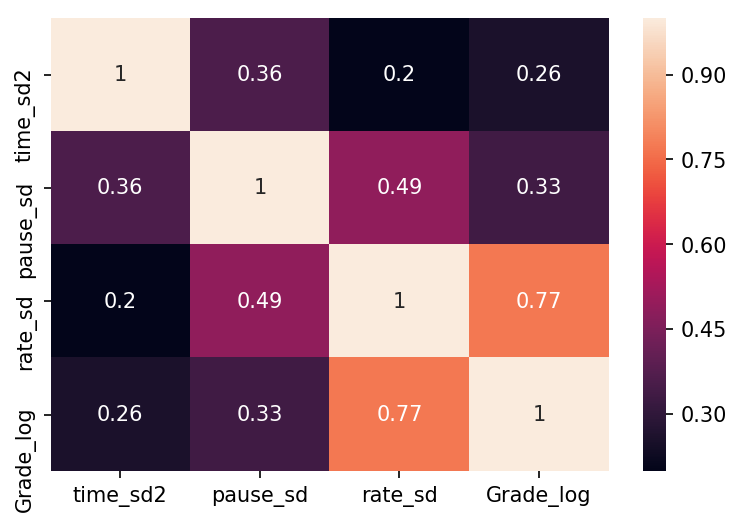

In [263]:
cor(week)

In [264]:
re = result(week)

Model Result:
                            OLS Regression Results                            
Dep. Variable:              Grade_log   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     42.13
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           2.30e-16
Time:                        17:45:33   Log-Likelihood:                -89.538
No. Observations:                  83   AIC:                             187.1
Df Residuals:                      79   BIC:                             196.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1966      0.131      


 Residual Analysis:


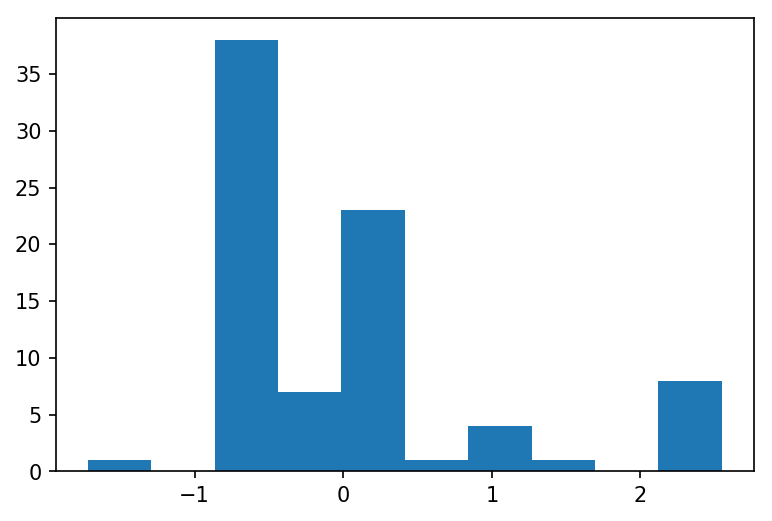

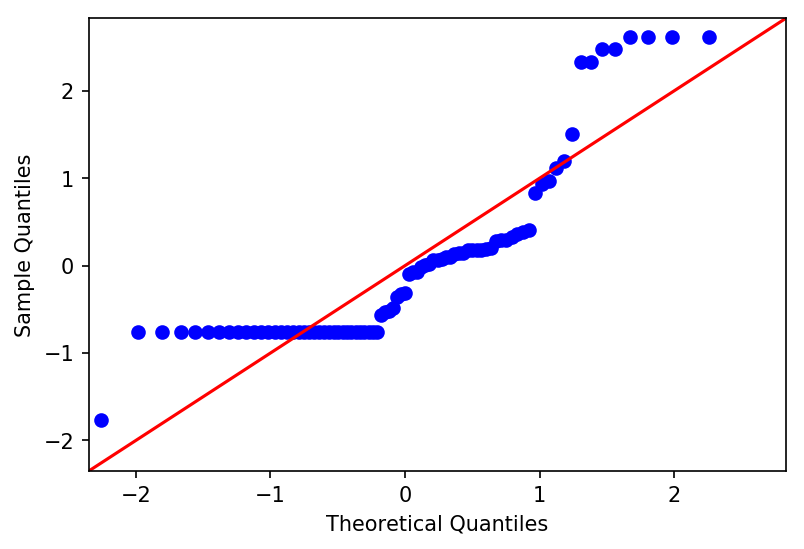

In [265]:
residual(re)

In [266]:
stat, p = stats.shapiro(re.resid_pearson)
print('Shapiro Statistics = %.3f, p = %.3f' % (stat, p))

Shapiro Statistics = 0.788, p = 0.000


Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


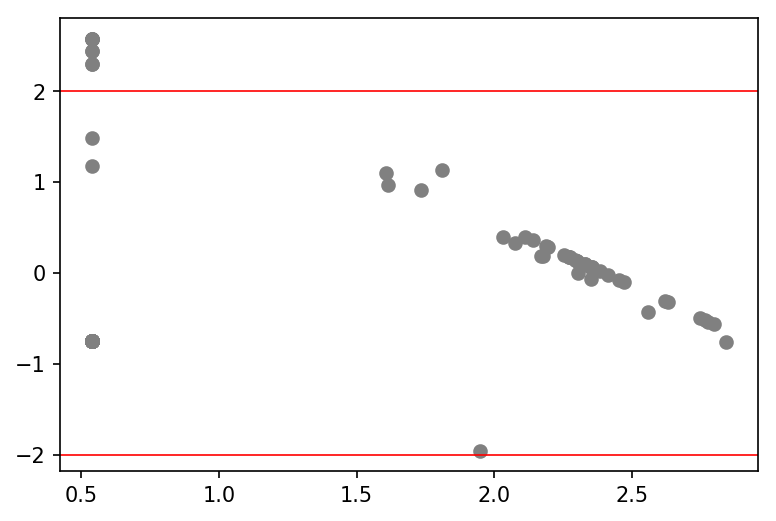

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,
88,0.717933,-0.47943,-0.926175,2.197225
98,0.717933,-0.47943,-0.926175,2.302585
100,0.717933,-0.47943,-0.926175,2.397895
117,0.717933,-0.47943,-0.926175,2.302585
129,0.717933,-0.47943,-0.926175,2.397895
154,0.717933,-0.47943,-0.926175,2.397895
163,0.717933,-0.47943,-0.926175,2.197225
166,0.717933,-0.47943,-0.926175,2.397895


,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,


In [267]:
y = outlier(re)
display(week[y >= 2])
display(week[y <= -2])

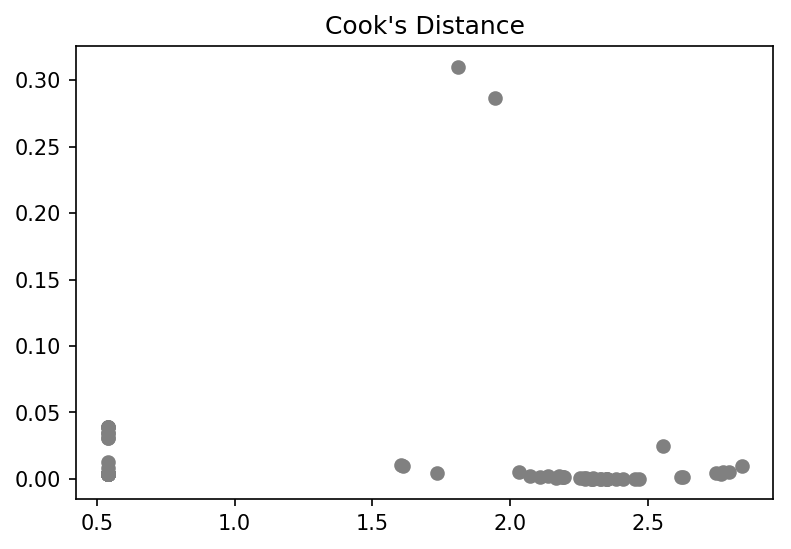

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,


In [268]:
cook = cooks(re)
display(week[cook>=1])

### Week4

,time_sd2,pause_sd,rate_sd,Grade_log
count,83.000000,8.300000e+01,8.300000e+01,83.000000
mean,0.987952,8.426994e-17,-1.471380e-17,1.482194
std,0.949033,1.000000e+00,1.000000e+00,1.153608
min,0.001143,-5.107106e-01,-9.264568e-01,0.000000
25%,0.632110,-5.107106e-01,-9.264568e-01,0.000000
50%,0.632110,-5.107106e-01,-9.264568e-01,2.397895
75%,0.908652,2.790461e-01,9.555259e-01,2.397895
max,5.292957,4.840294e+00,1.592264e+00,2.397895


Sctter Plot:


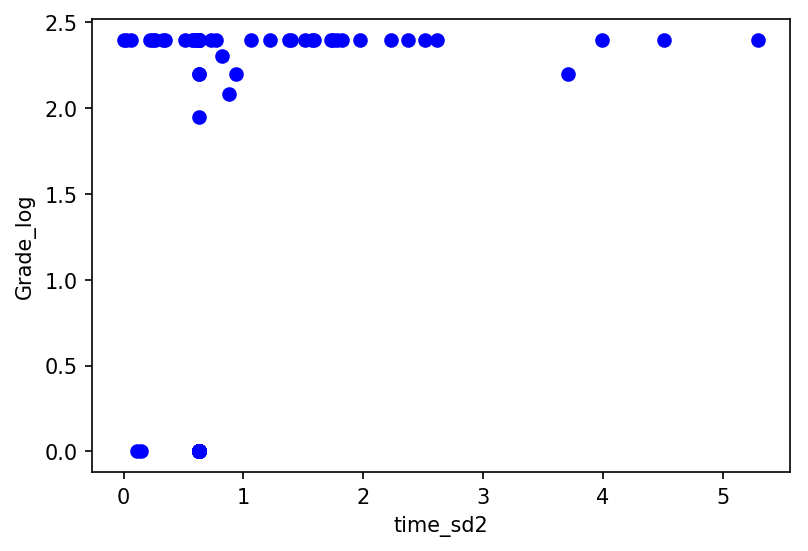

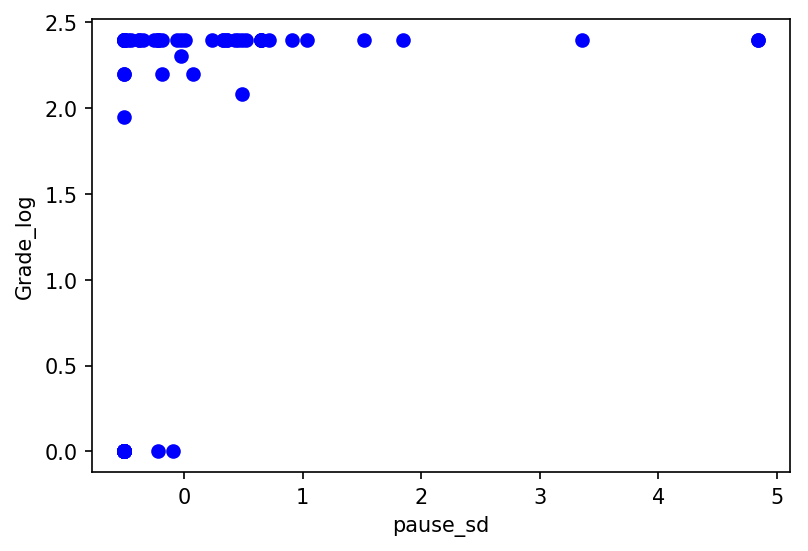

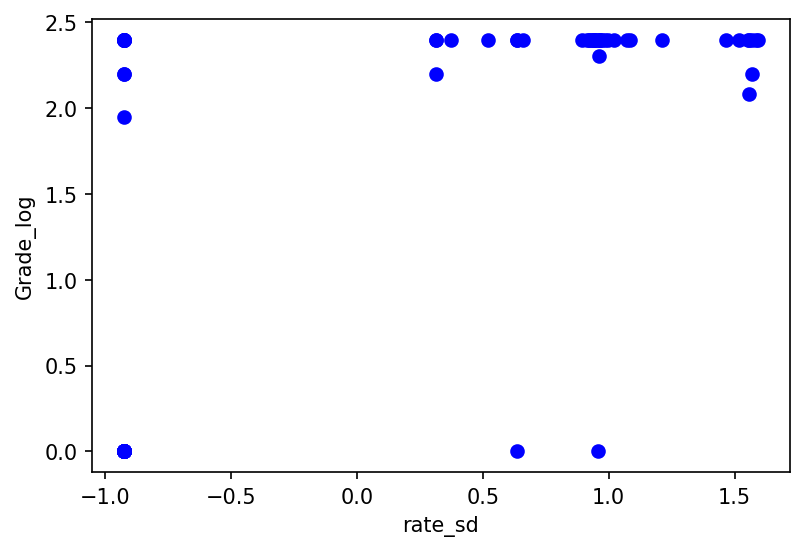

In [269]:
week = show(4)

Correlation coefficients:


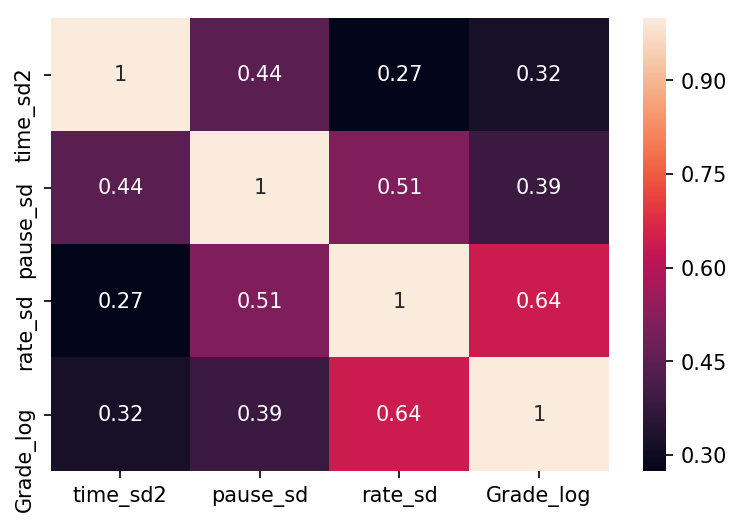

In [270]:
cor(week)

In [271]:
re = result(week)

Model Result:
                            OLS Regression Results                            
Dep. Variable:              Grade_log   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     19.95
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           1.01e-09
Time:                        17:46:28   Log-Likelihood:                -105.73
No. Observations:                  83   AIC:                             219.5
Df Residuals:                      79   BIC:                             229.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3036      0.150      


 Residual Analysis:


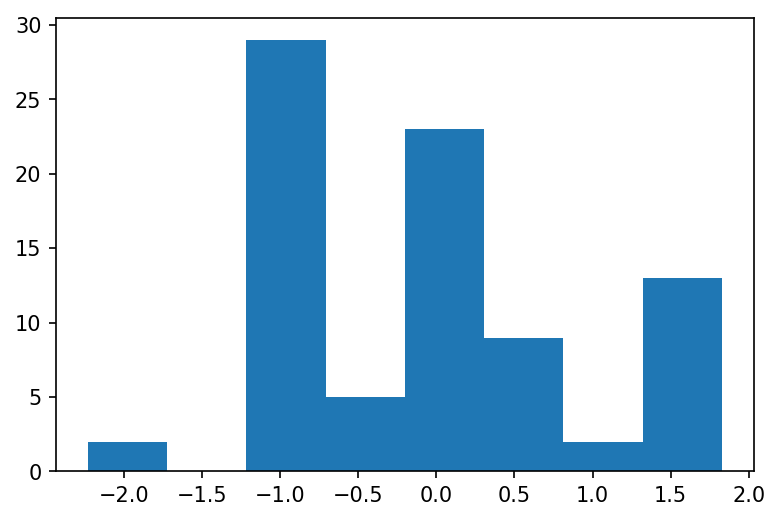

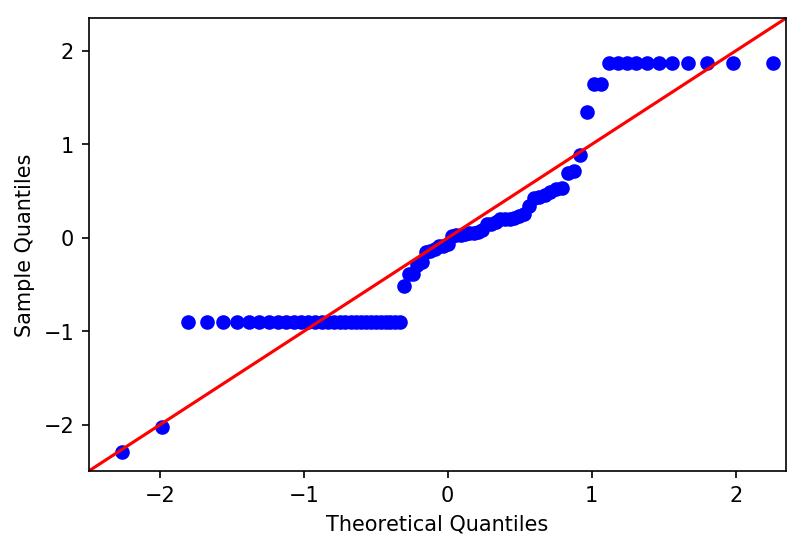

In [272]:
residual(re)

In [273]:
stat, p = stats.shapiro(re.resid_pearson)
print('Shapiro Statistics = %.3f, p = %.3f' % (stat, p))

Shapiro Statistics = 0.884, p = 0.000


Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


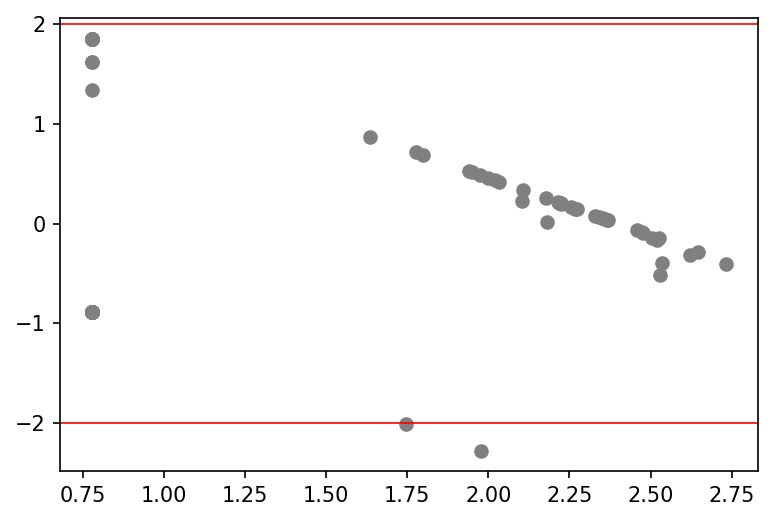

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,


,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,
110,0.107938,-0.220596,0.634755,0.0
138,0.148905,-0.091656,0.959132,0.0


In [274]:
y = outlier(re)
display(week[y >= 2])
display(week[y <= -2])

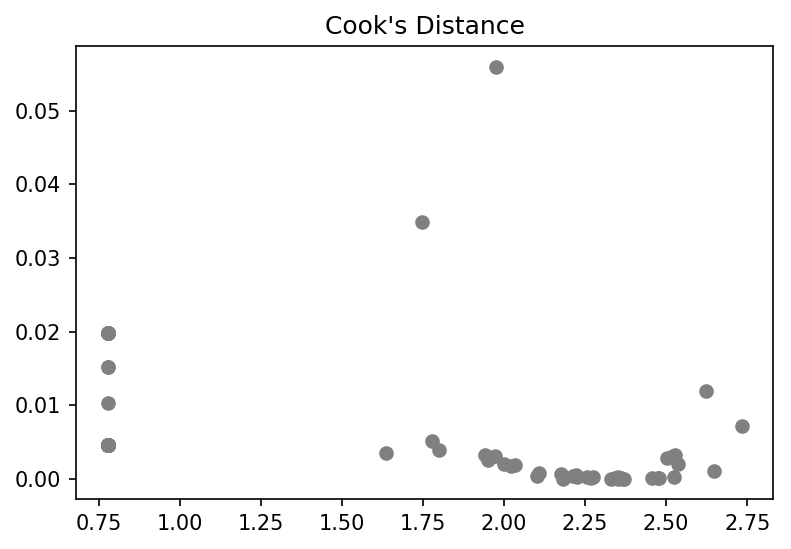

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,


In [275]:
cook = cooks(re)
display(week[cook>=1])

### Week5

,time_sd2,pause_sd,rate_sd,Grade_log
count,83.000000,8.300000e+01,8.300000e+01,83.000000
mean,0.987952,-8.828279e-17,4.414140e-17,1.143350
std,1.094708,1.000000e+00,1.000000e+00,1.099788
min,0.000343,-4.260707e-01,-7.795696e-01,0.000000
25%,0.483087,-4.260707e-01,-7.795696e-01,0.000000
50%,0.483087,-4.260707e-01,-7.795696e-01,1.609438
75%,0.943551,-2.321876e-02,1.106409e+00,2.249905
max,5.909296,5.148530e+00,1.857836e+00,2.397895


Sctter Plot:


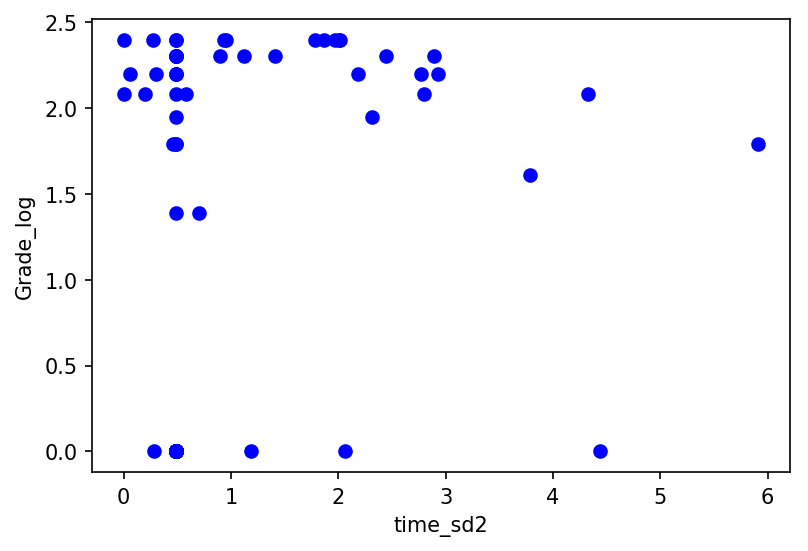

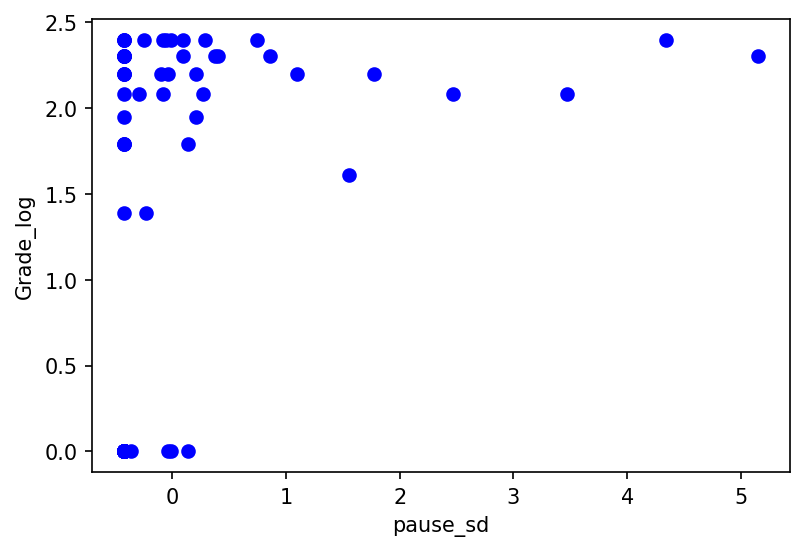

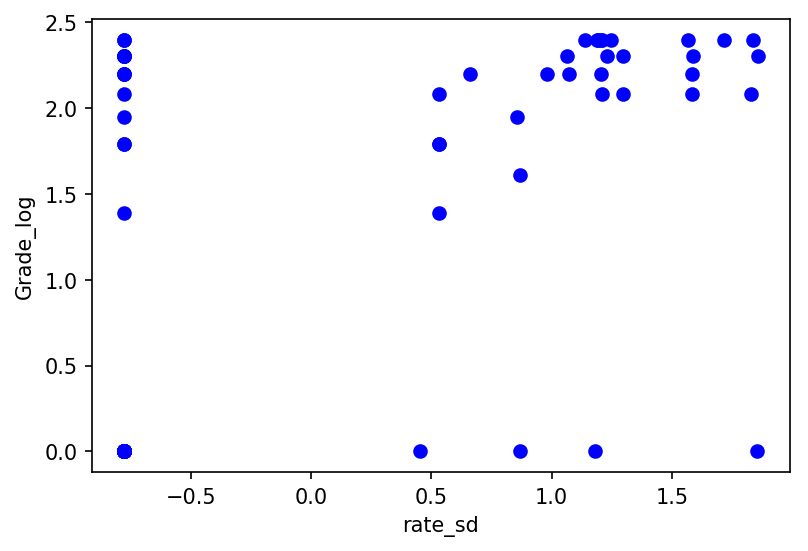

In [276]:
week = show(5)

Correlation coefficients:


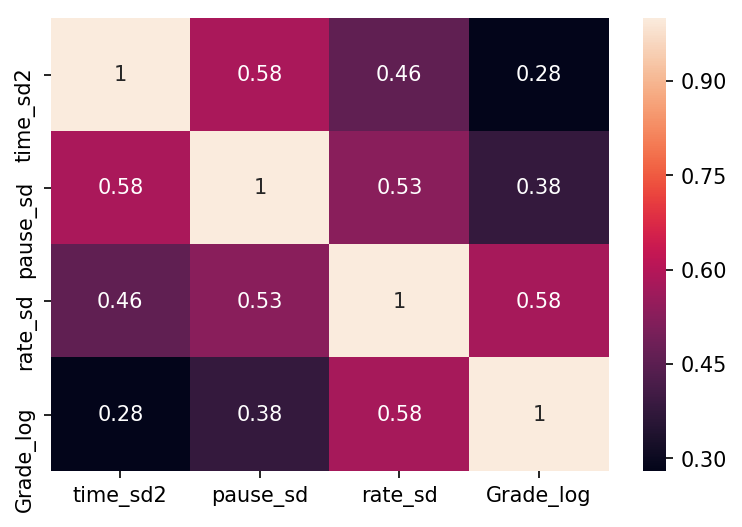

In [277]:
cor(week)

In [278]:
re = result(week)

Model Result:
                            OLS Regression Results                            
Dep. Variable:              Grade_log   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     13.64
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           2.95e-07
Time:                        17:48:15   Log-Likelihood:                -107.84
No. Observations:                  83   AIC:                             223.7
Df Residuals:                      79   BIC:                             233.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1747      0.152      


 Residual Analysis:


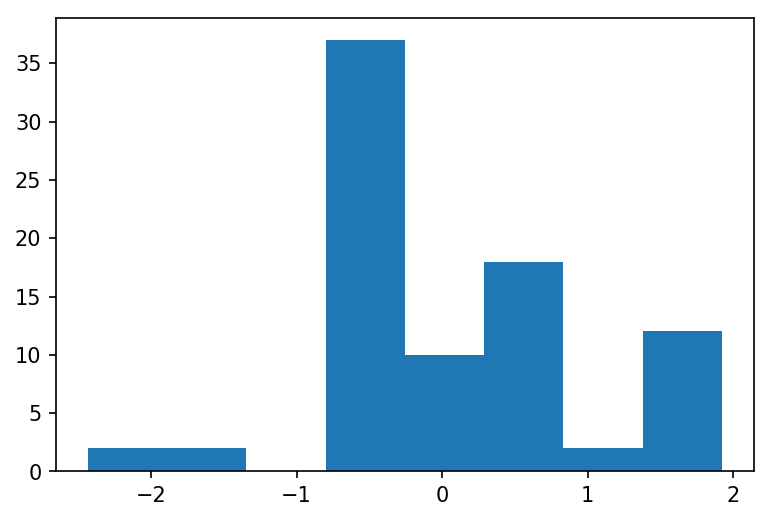

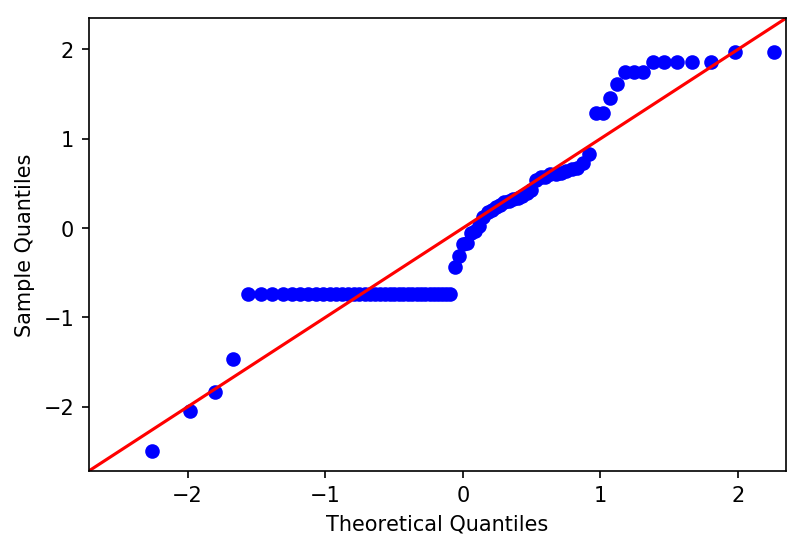

In [279]:
residual(re)

In [280]:
stat, p = stats.shapiro(re.resid_pearson)
print('Shapiro Statistics = %.3f, p = %.3f' % (stat, p))

Shapiro Statistics = 0.896, p = 0.000


Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


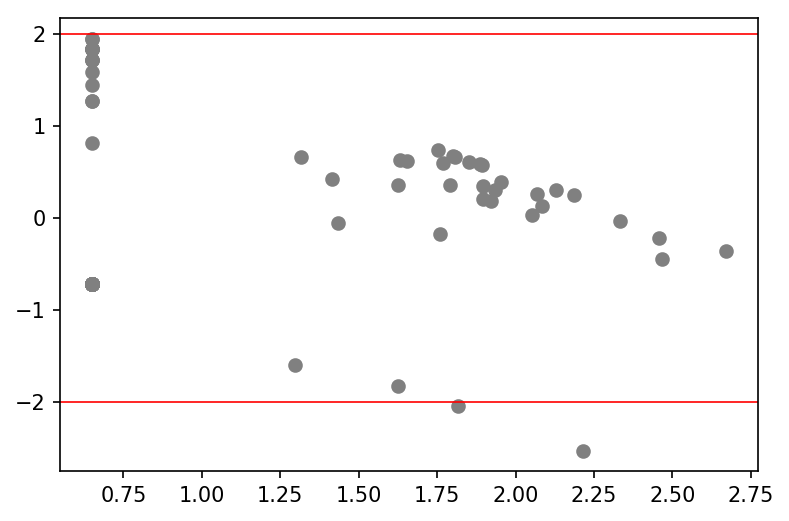

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,


,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,
104,1.189599,-0.034107,1.853560,0.0
155,2.063392,0.140100,1.182359,0.0


In [281]:
y = outlier(re)
display(week[y >= 2])
display(week[y <= -2])

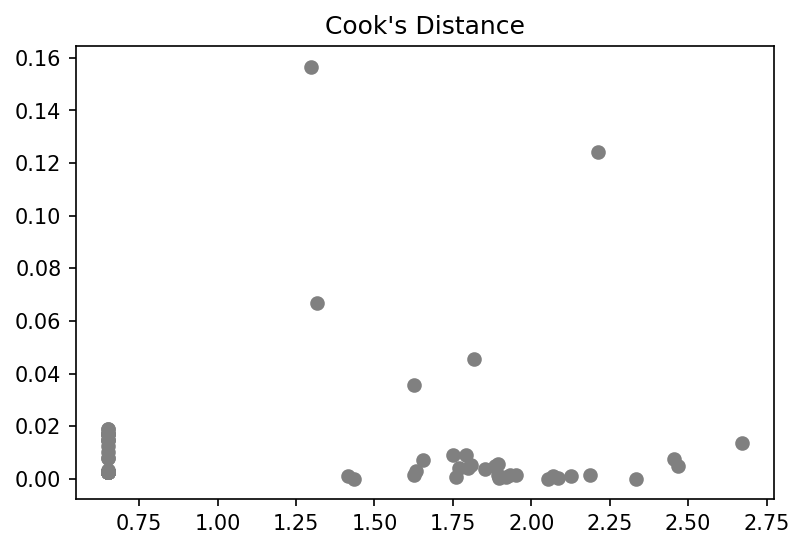

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,


In [282]:
cook = cooks(re)
display(week[cook>=1])

### Week6

,time_sd2,pause_sd,rate_sd,Grade_log
count,83.000000,8.300000e+01,8.300000e+01,83.000000
mean,0.987952,6.554329e-17,-1.016590e-16,1.304798
std,0.882226,1.000000e+00,1.000000e+00,1.159352
min,0.000070,-5.513077e-01,-1.064255e+00,0.000000
25%,0.731616,-5.513077e-01,-1.064255e+00,0.000000
50%,0.757927,-4.840652e-01,2.307921e-01,2.197225
75%,0.781882,1.883601e-01,8.980385e-01,2.397895
max,4.435468,4.878526e+00,1.599234e+00,2.397895


Sctter Plot:


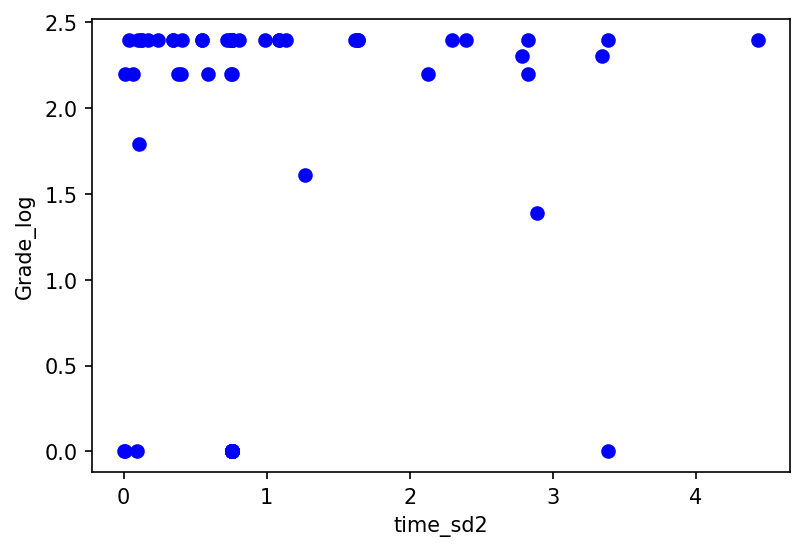

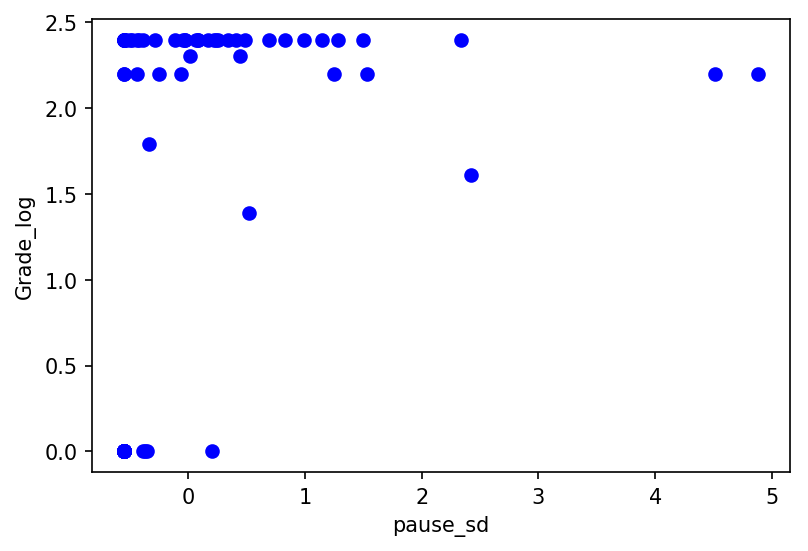

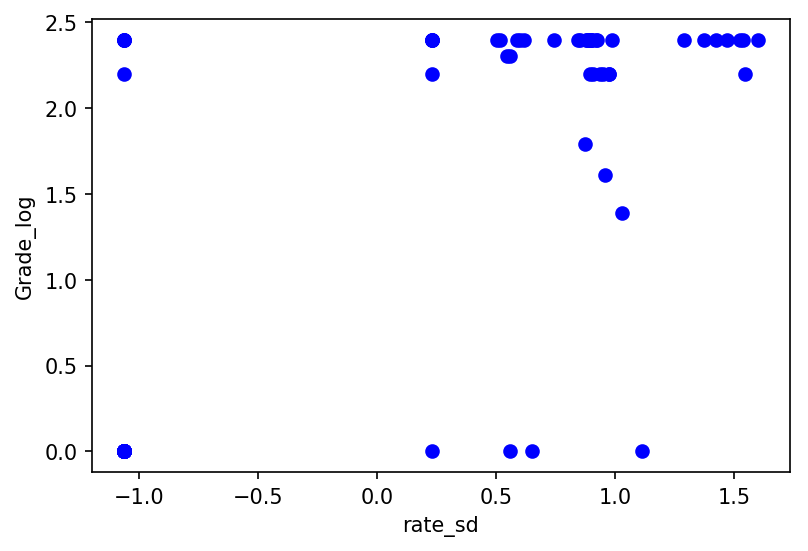

In [283]:
week = show(6)

Correlation coefficients:


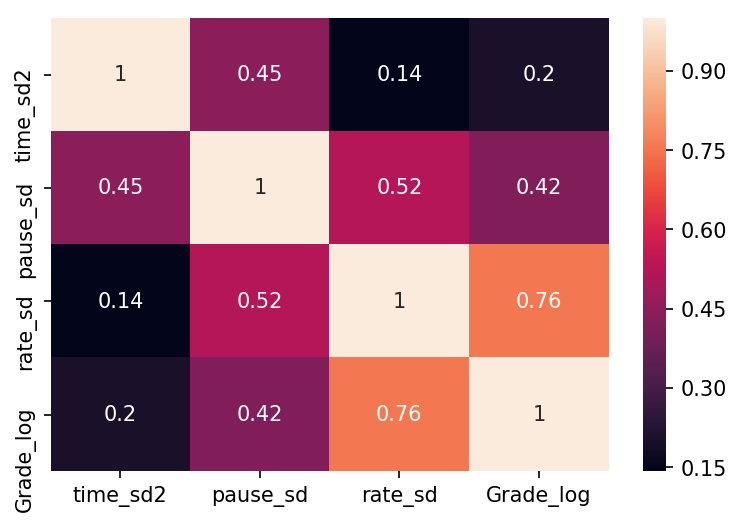

In [284]:
cor(week)

In [285]:
re = result(week)

Model Result:
                            OLS Regression Results                            
Dep. Variable:              Grade_log   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     36.39
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           7.10e-15
Time:                        17:49:09   Log-Likelihood:                -93.522
No. Observations:                  83   AIC:                             195.0
Df Residuals:                      79   BIC:                             204.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1717      0.136      


 Residual Analysis:


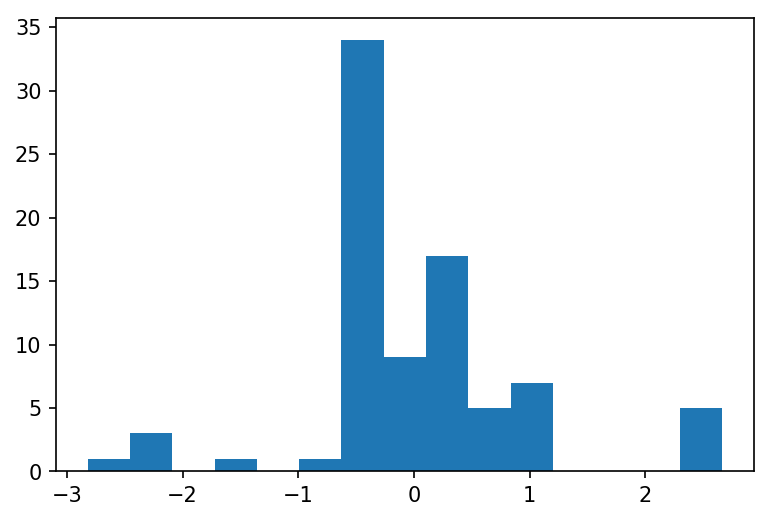

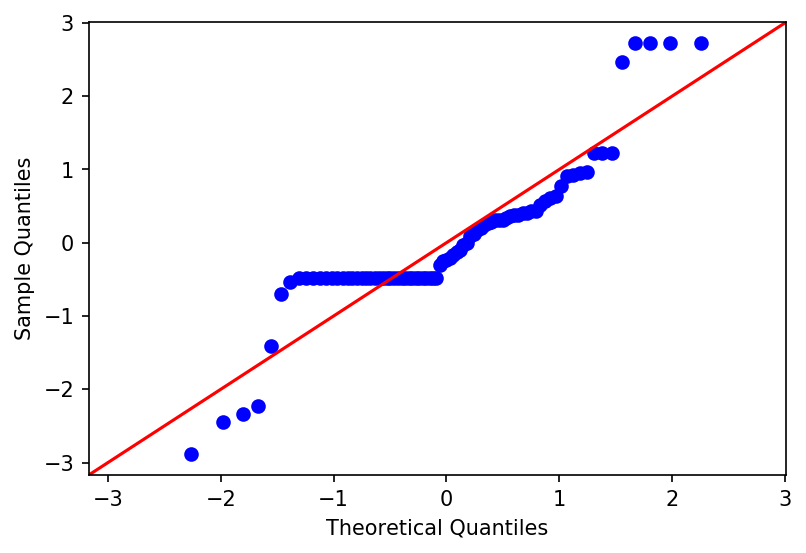

In [286]:
residual(re)

In [287]:
stat, p = stats.shapiro(re.resid_pearson)
print('Shapiro Statistics = %.3f, p = %.3f' % (stat, p))

Shapiro Statistics = 0.862, p = 0.000


Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


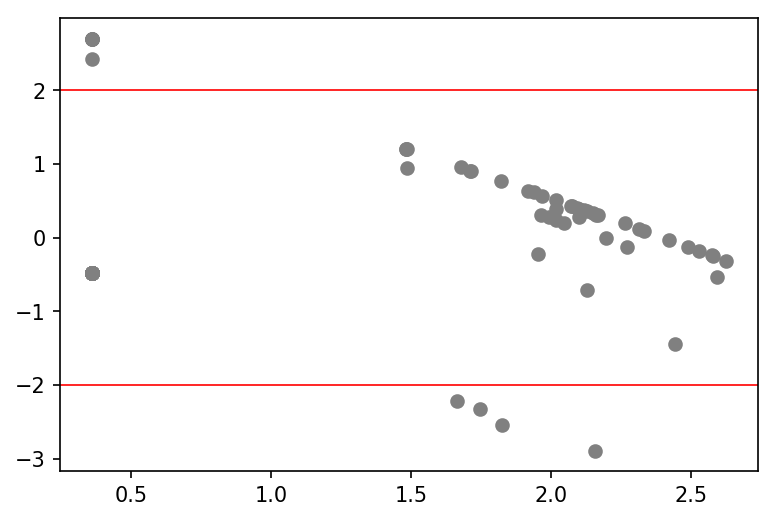

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,
133,0.757927,-0.551308,-1.064255,2.197225
136,0.757927,-0.551308,-1.064255,2.397895
146,0.757927,-0.551308,-1.064255,2.397895
161,0.757927,-0.551308,-1.064255,2.397895
166,0.757927,-0.551308,-1.064255,2.397895


,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,
111,0.000070,-0.366391,0.559523,0.0
119,3.390658,0.205171,0.230792,0.0
130,0.008618,-0.383201,0.652022,0.0
139,0.089999,-0.349580,1.113412,0.0


In [288]:
y = outlier(re)
display(week[y >= 2])
display(week[y <= -2])

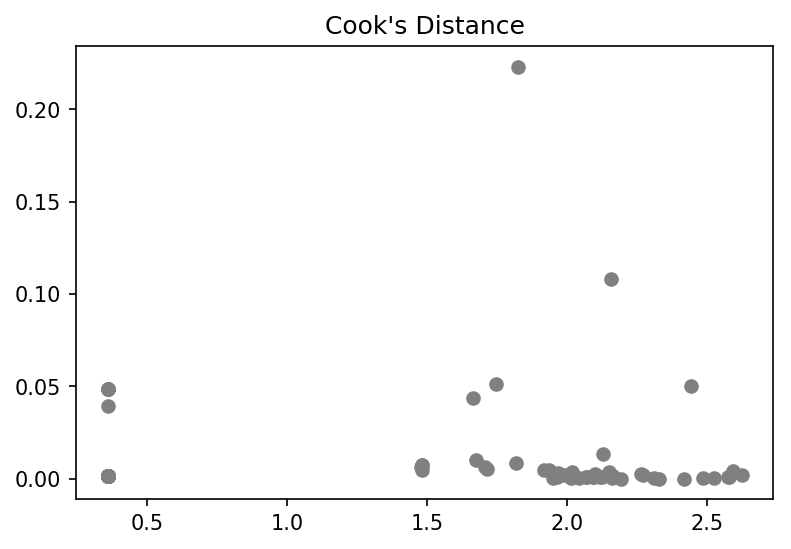

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,


In [289]:
cook = cooks(re)
display(week[cook>=1])

### Week7

,time_sd2,pause_sd,rate_sd,Grade_log
count,83.000000,8.300000e+01,8.300000e+01,83.000000
mean,0.987952,-2.742117e-17,-1.471380e-16,1.182572
std,1.070271,1.000000e+00,1.000000e+00,1.105854
min,0.000059,-4.755412e-01,-9.080647e-01,0.000000
25%,0.639429,-4.755412e-01,-9.080647e-01,0.000000
50%,0.639429,-4.755412e-01,-9.080647e-01,1.945910
75%,0.795981,1.375533e-02,9.671281e-01,2.302585
max,5.941813,4.781260e+00,1.617317e+00,2.397895


Sctter Plot:


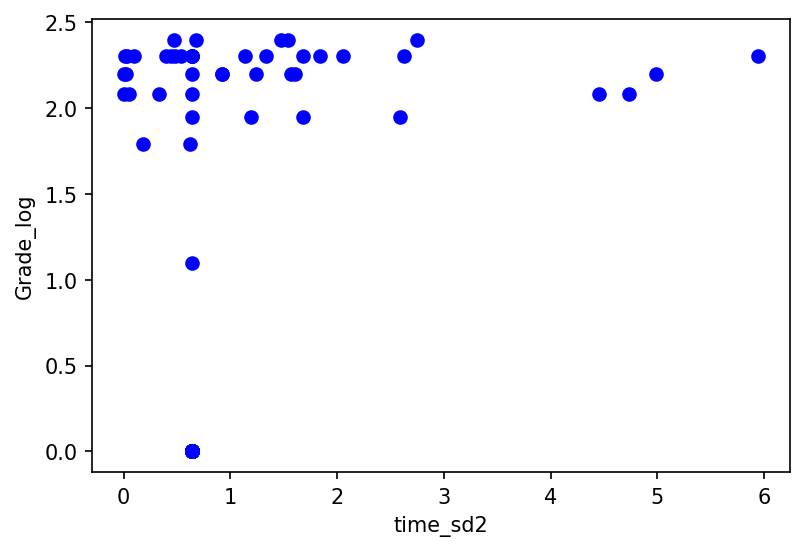

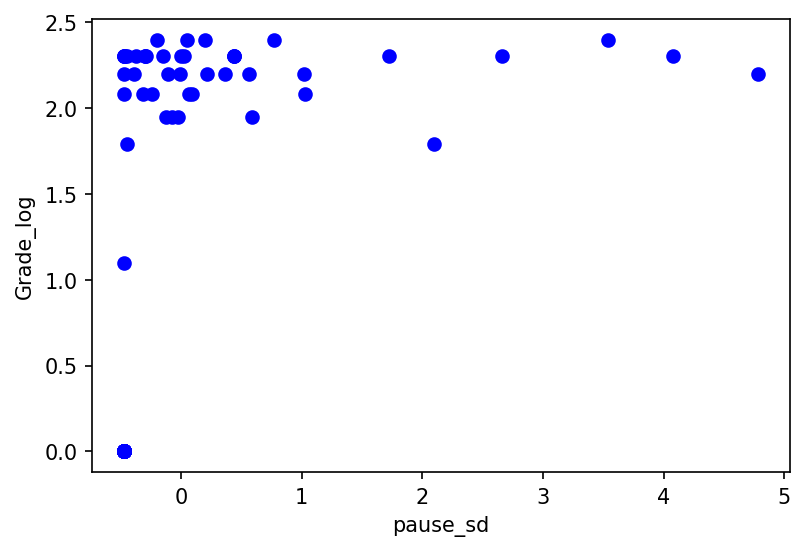

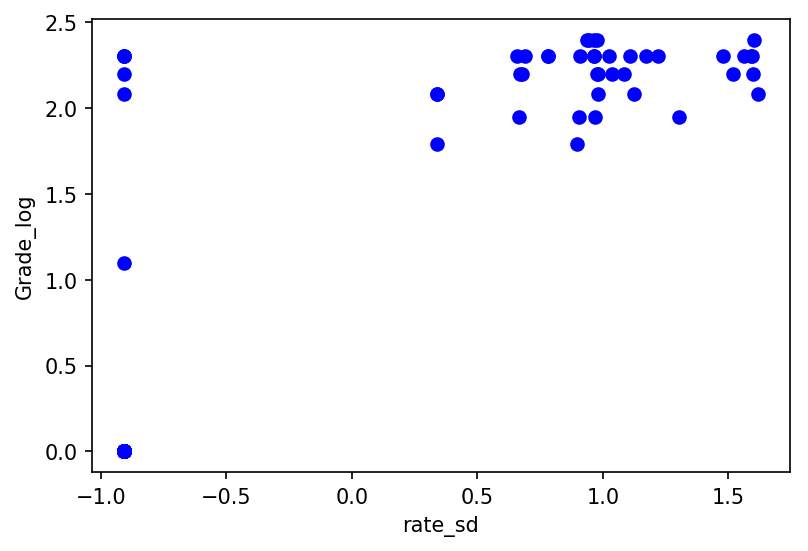

In [290]:
week = show(7)

Correlation coefficients:


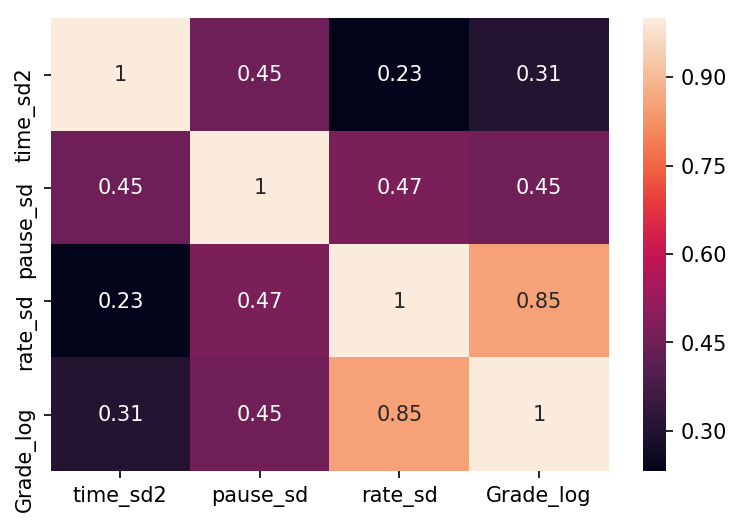

In [291]:
cor(week)

In [292]:
re = result(week)

Model Result:
                            OLS Regression Results                            
Dep. Variable:              Grade_log   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     75.89
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           3.35e-23
Time:                        17:49:40   Log-Likelihood:                -69.333
No. Observations:                  83   AIC:                             146.7
Df Residuals:                      79   BIC:                             156.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0717      0.091     1


 Residual Analysis:


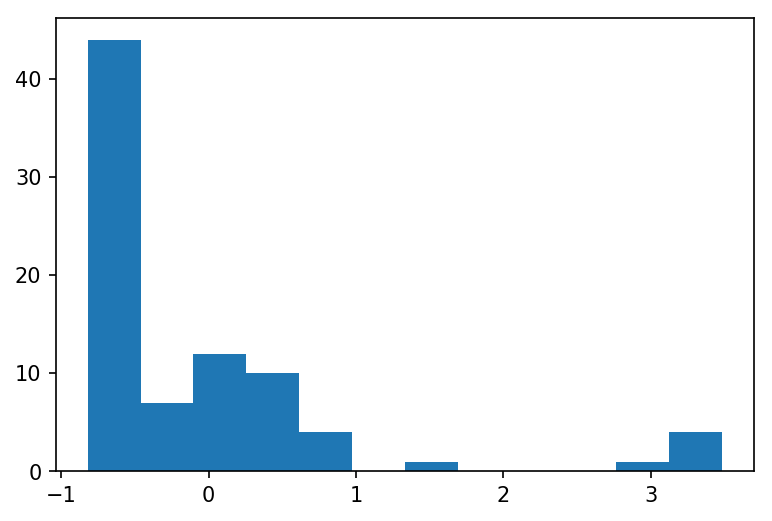

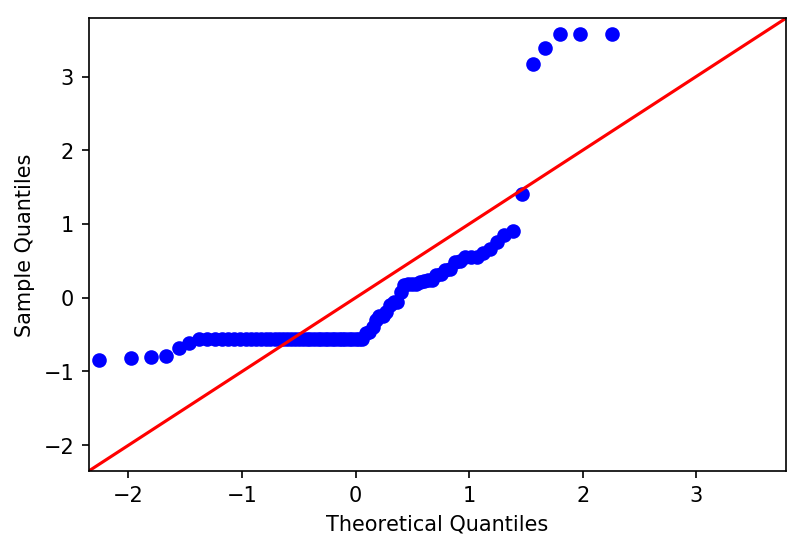

In [293]:
residual(re)

In [294]:
stat, p = stats.shapiro(re.resid_pearson)
print('Shapiro Statistics = %.3f, p = %.3f' % (stat, p))

Shapiro Statistics = 0.643, p = 0.000


Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


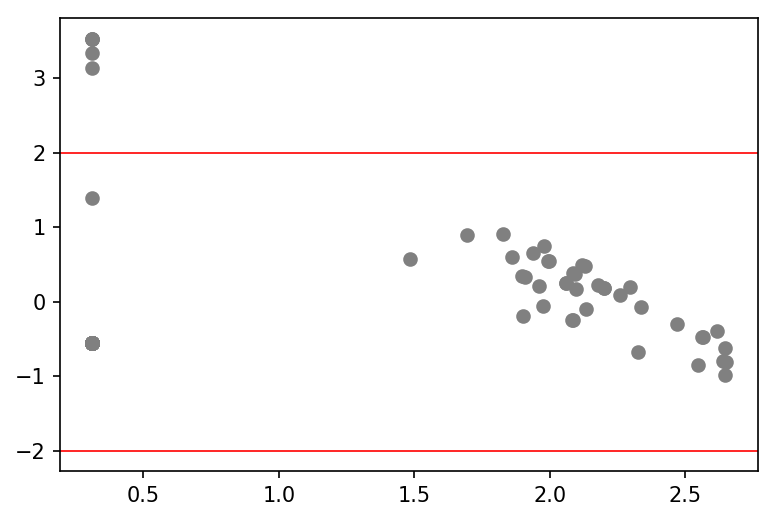

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,
97,0.639429,-0.475541,-0.908065,2.302585
103,0.639429,-0.475541,-0.908065,2.302585
146,0.639429,-0.475541,-0.908065,2.079442
154,0.639429,-0.475541,-0.908065,2.302585
166,0.639429,-0.475541,-0.908065,2.197225


,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,


In [295]:
y = outlier(re)
display(week[y >= 2])
display(week[y <= -2])

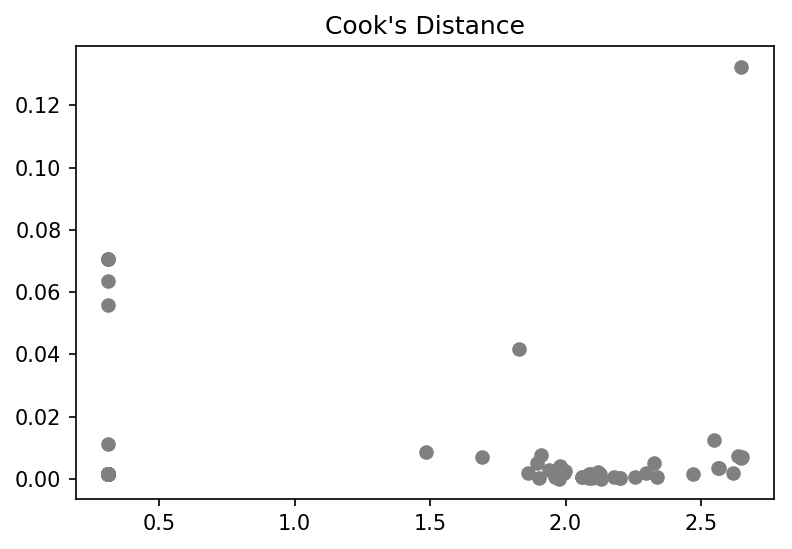

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,


In [296]:
cook = cooks(re)
display(week[cook>=1])

### Week8

,time_sd2,pause_sd,rate_sd,Grade_log
count,83.000000,8.300000e+01,8.300000e+01,83.000000
mean,0.987952,-2.073308e-17,-4.949187e-17,1.184671
std,1.233401,1.000000e+00,1.000000e+00,1.180288
min,0.000003,-4.096726e-01,-9.038637e-01,0.000000
25%,0.683294,-4.096726e-01,-9.038637e-01,0.000000
50%,0.683294,-4.096726e-01,-9.038637e-01,1.945910
75%,0.764133,-6.752064e-02,9.536578e-01,2.397895
max,9.688604,6.103013e+00,1.599314e+00,2.397895


Sctter Plot:


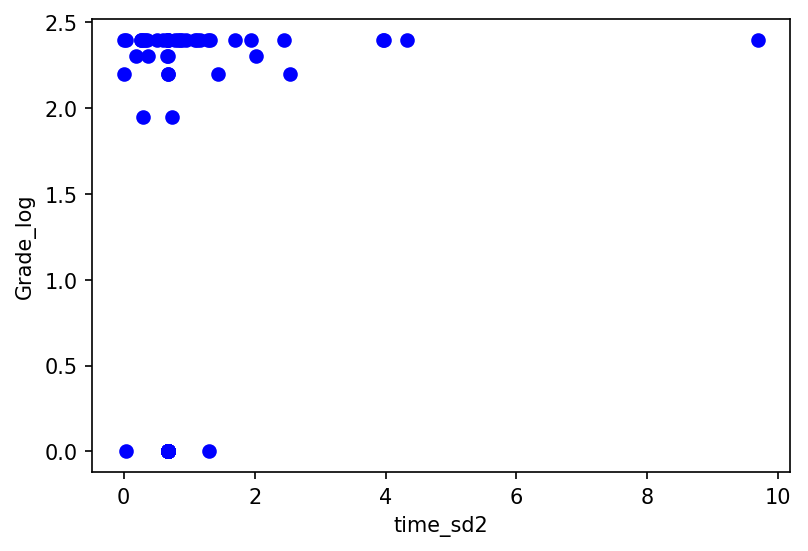

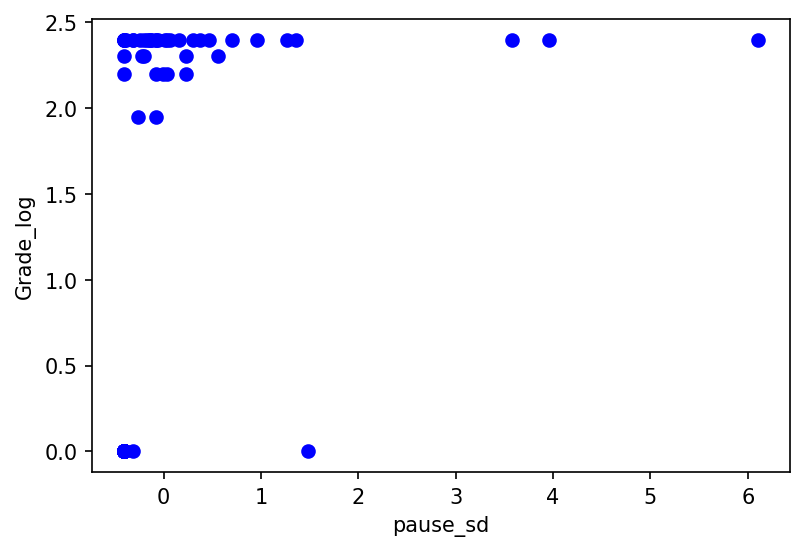

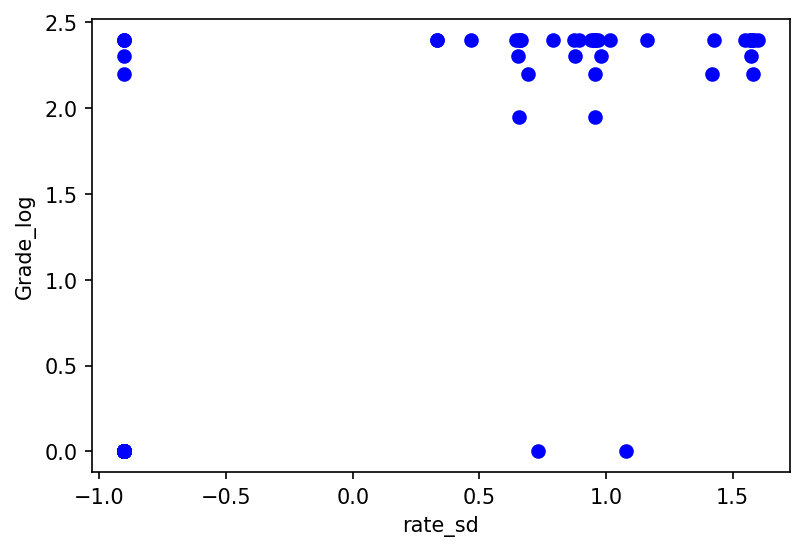

In [297]:
week = show(8)

Correlation coefficients:


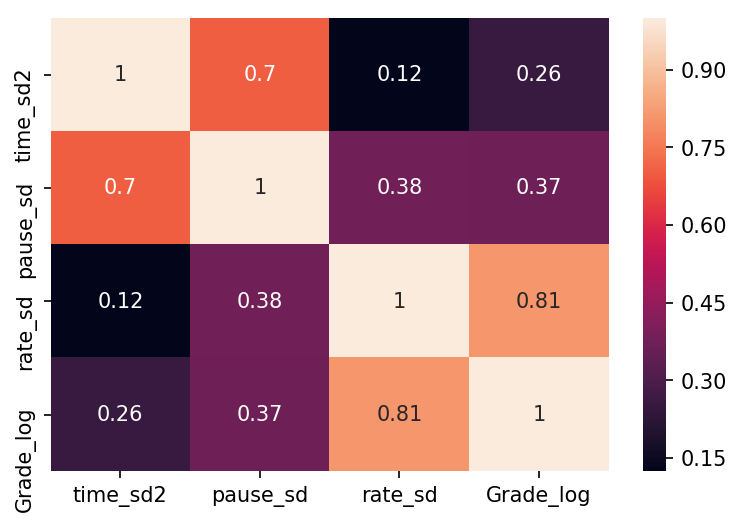

In [298]:
cor(week)

In [299]:
re = result(week)

Model Result:
                            OLS Regression Results                            
Dep. Variable:              Grade_log   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     57.13
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           9.67e-20
Time:                        17:50:35   Log-Likelihood:                -83.152
No. Observations:                  83   AIC:                             174.3
Df Residuals:                      79   BIC:                             184.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9747      0.114      


 Residual Analysis:


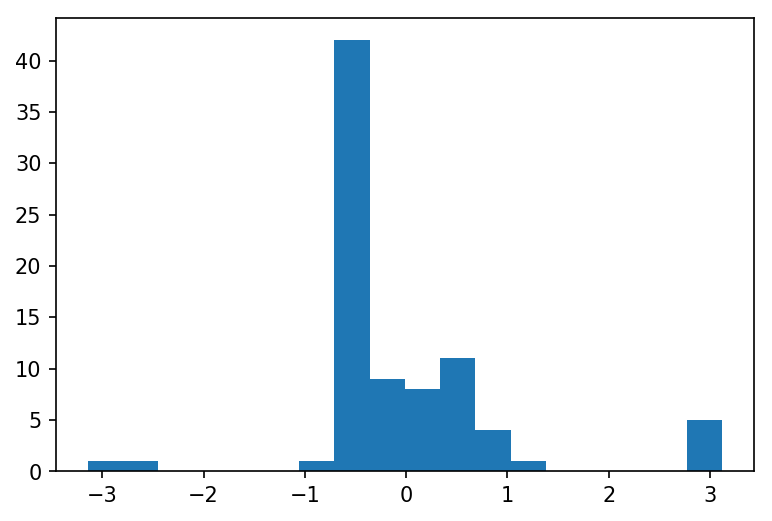

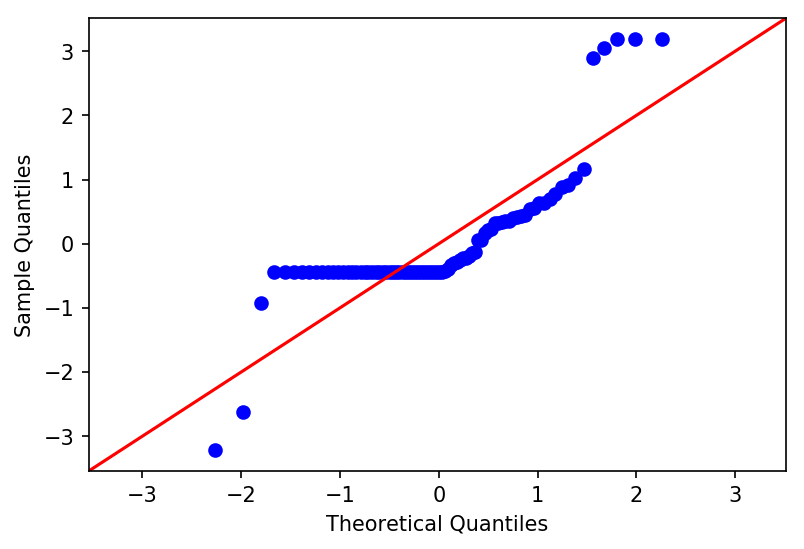

In [300]:
residual(re)

In [301]:
stat, p = stats.shapiro(re.resid_pearson)
print('Shapiro Statistics = %.3f, p = %.3f' % (stat, p))

Shapiro Statistics = 0.722, p = 0.000


Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


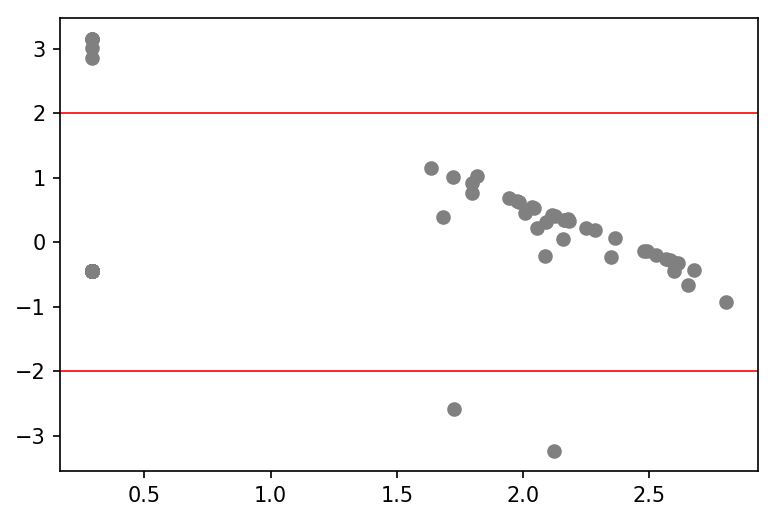

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,
97,0.683294,-0.409673,-0.903864,2.397895
133,0.683294,-0.409673,-0.903864,2.397895
154,0.683294,-0.409673,-0.903864,2.397895
166,0.683294,-0.409673,-0.903864,2.197225
168,0.683294,-0.409673,-0.903864,2.302585


,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,
89,0.034229,-0.315286,0.732447,0.0
158,1.303596,1.478062,1.077169,0.0


In [302]:
y = outlier(re)
display(week[y >= 2])
display(week[y <= -2])

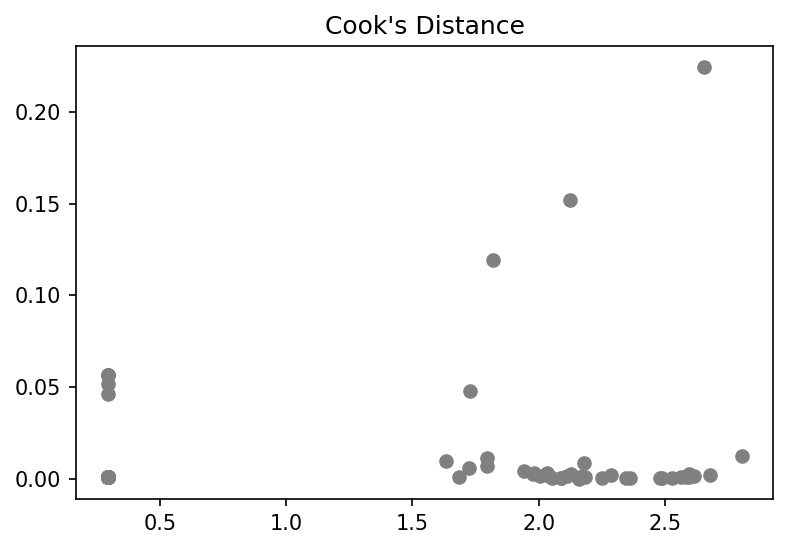

,time_sd2,pause_sd,rate_sd,Grade_log
0,,,,


In [303]:
cook = cooks(re)
display(week[cook>=1])